Reference 자료

http://interxlab.com/use_case/575

https://blog.daum.net/asgi2/18354599



In [294]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 50)

from scipy import stats

import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor


In [295]:
df_raw_labeled = pd.read_csv(r'data/경진대회용 사출성형기 데이터셋_labeled.csv')

In [296]:
df_raw_unlabeled = pd.read_csv(r'data/경진대회용 사출성형기 데이터셋_unlabeled.csv', index_col=0)

## 데이터 살펴보기

In [4]:
display(df_raw_labeled.head(3))
df_raw_labeled.shape

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(7996, 45)

In [181]:
display(df_raw_unlabeled.head(3))
df_raw_unlabeled.shape

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f9136166e37704af878240e,2020-01-02 00:59:22,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,3.18,2.66,13.14,0.0,12.3,9.9,10.0,59.9,0.0,35.6,0.0,0.0,103.2,102.8,0.0,0.0,0.0,261.8,270.4,271.1,273.5,260.3,18.8,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
1,5f9136166e37704af878240f,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.29,2.78,13.72,0.0,12.5,9.0,10.0,59.9,883.3,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
2,5f9136166e37704af8782410,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.29,2.78,13.72,0.0,12.5,9.0,10.0,59.9,883.3,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0


(795315, 45)

In [6]:
df_raw_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7996 non-null   object 
 1   TimeStamp                 7996 non-null   object 
 2   PART_FACT_PLAN_DATE       7996 non-null   object 
 3   PART_FACT_SERIAL          7996 non-null   int64  
 4   PART_NAME                 7996 non-null   object 
 5   EQUIP_CD                  7996 non-null   object 
 6   EQUIP_NAME                7996 non-null   object 
 7   PassOrFail                7996 non-null   object 
 8   Reason                    7996 non-null   object 
 9   Injection_Time            7996 non-null   float64
 10  Filling_Time              7996 non-null   float64
 11  Plasticizing_Time         7996 non-null   float64
 12  Cycle_Time                7996 non-null   float64
 13  Clamp_Close_Time          7996 non-null   float64
 14  Cushion_

In [464]:
df_raw_unlabeled.describe().to_csv('test.csv')

In [222]:
from datetime import datetime

df_tmp = df_raw_unlabeled['TimeStamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [224]:
df_tmp = df_tmp.drop_duplicates()

In [229]:
df_tmp

0        2020-01-02 00:59:22
1        2020-01-02 01:01:01
3        2020-01-02 01:02:24
5        2020-01-02 01:03:45
7        2020-01-02 01:05:06
                 ...        
795308   2020-10-23 05:30:10
795310   2020-10-23 05:30:20
795311   2020-10-23 05:30:24
795312   2020-10-23 05:31:13
795314   2020-10-23 05:31:28
Name: TimeStamp, Length: 591556, dtype: datetime64[ns]

In [203]:
df_raw_unlabeled[df_raw_unlabeled.describe().columns].mode().to_csv('test2.csv')

In [8]:
for i in df_raw_labeled.columns:
    display(i,df_raw_labeled[i].unique(),df_raw_labeled[i].nunique())

'_id'

array(['5f8928bb9c0189cc666ef19b', '5f8928de9c0189cc666ef20b',
       '5f8928df9c0189cc666ef213', ..., '5fa36afd9c0189cc66eebe41',
       '5fa36b009c0189cc66eebed7', '5fa4d0ce9c0189cc66fc7a13'],
      dtype=object)

5232

'TimeStamp'

array(['2020-10-16 04:57:47', '2020-10-16 04:58:48',
       '2020-10-16 04:59:48', ..., '2020-11-04 05:43:29',
       '2020-11-05 03:00:02', '2020-11-06 04:27:38'], dtype=object)

2625

'PART_FACT_PLAN_DATE'

array(['2020-10-16 오전 12:00:00', '2020-10-20 오전 12:00:00',
       '2020-10-21 오전 12:00:00', '2020-10-22 오전 12:00:00',
       '2020-10-23 오전 12:00:00', '2020-10-27 오전 12:00:00',
       '2020-10-28 오전 12:00:00', '2020-10-29 오전 12:00:00',
       '2020-10-30 오전 12:00:00', '2020-11-03 오전 12:00:00',
       '2020-11-04 오전 12:00:00', '2020-11-05 오전 12:00:00',
       '2020-11-06 오전 12:00:00'], dtype=object)

13

'PART_FACT_SERIAL'

array([24, 23, 13, 14, 17, 18,  9, 10, 12, 11,  2, 21, 22,  6,  7,  3,  4],
      dtype=int64)

17

'PART_NAME'

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       'SP2 CVR ROOF RACK CTR, RH', "JX1 W/S SIDE MLD'G RH"], dtype=object)

6

'EQUIP_CD'

array(['S14', 'S01', 'S12'], dtype=object)

3

'EQUIP_NAME'

array(['650톤-우진2호기', '1800TON-우진', '650톤-우진'], dtype=object)

3

'PassOrFail'

array(['Y', 'N'], dtype=object)

2

'Reason'

array(['None', '가스', '미성형', '초기허용불량'], dtype=object)

4

'Injection_Time'

array([ 9.59000015,  9.60000038,  9.57999992,  9.56999969,  9.56000042,
        9.44999981,  9.43999958,  9.55000019,  9.53999996,  9.52999973,
        9.52000046,  9.51000023,  9.5       ,  9.43000031,  9.35999966,
        1.05999994,  1.04999995,  1.07000005,  9.64000034,  9.63000011,
        9.61999989,  9.60999966, 13.39000034, 10.82999992, 11.48999977,
        9.97999954,  9.69999981,  9.64999962, 16.30999947, 11.47999954,
       11.47000027,  9.48999977, 11.46000004,  9.93999958,  4.11999989,
        1.08000004])

36

'Filling_Time'

array([4.46999979, 4.48000002, 4.46000004, 4.44999981, 4.44000006,
       4.32999992, 4.48999977, 4.42999983, 4.42000008, 4.40999985,
       4.4000001 , 4.38999987, 4.32000017, 4.23999977, 0.93000001,
       0.94      , 4.51999998, 4.53000021, 4.51000023, 4.5       ,
       8.27000046, 5.71999979, 6.36999989, 4.86999989, 4.57999992,
       3.        , 3.3599999 , 3.36999989, 4.38000011, 3.3499999 ,
       4.82000017, 4.36999989, 3.99000001, 0.95999998, 0.94999999])

35

'Plasticizing_Time'

array([16.92000008, 16.90999985, 16.89999962, 16.95000076, 16.88999939,
       16.87999916, 16.87000084, 16.93000031, 16.96999931, 16.94000053,
       16.95999908, 16.97999954, 16.98999977, 17.        , 17.01000023,
       17.02000046, 17.04000092, 17.03000069, 17.04999924, 17.05999947,
       17.07999992, 17.06999969, 17.09000015, 17.10000038, 17.11000061,
       17.12000084, 17.12999916, 17.14999962, 17.13999939, 17.26000023,
       17.51000023, 18.15999985, 19.02000046, 21.10000038, 13.01000023,
       12.98999977, 12.94999981, 13.02000046, 12.97000027, 13.06000042,
       13.        , 12.96000004, 13.03999996, 12.93000031, 13.06999969,
       12.97999954, 13.09000015, 12.93999958, 12.89000034, 12.92000008,
       12.86999989, 12.90999985, 12.89999962, 13.02999973, 12.88000011,
       12.85000038, 12.82999992, 12.85999966, 12.84000015, 12.80000019,
       12.81000042, 16.73999977, 16.78000069, 16.75      , 16.72999954,
       16.71999931, 16.77000046, 16.79000092, 16.70999908, 16.52

121

'Cycle_Time'

array([59.52000046, 59.58000183, 59.56000137, 60.        , 59.41999817,
       59.43999863, 59.40000153, 59.54000092, 59.47999954, 59.90000153,
       59.45999908, 59.5       , 59.36000061, 61.77999878, 61.75999832,
       61.75      , 61.77000046, 61.72999954, 61.72000122, 61.79999924,
       61.74000168, 62.20000076, 61.97999954, 59.61999893, 59.59999847,
       62.36000061, 60.45999908, 58.95999908, 66.86000061, 64.34999847,
       64.30999756, 64.31999969, 64.29000092, 59.95999908, 64.30000305,
       59.75999832, 59.86000061, 59.45000076, 59.47000122, 64.33000183,
       61.90000153, 58.84000015, 59.65999985, 59.93999863, 62.18000031,
       59.70000076, 61.70999908, 61.95999908])

48

'Clamp_Close_Time'

array([7.13000011, 7.13999987, 7.11999989, 6.80999994, 6.80000019,
       6.78999996, 7.17999983, 7.11000013, 5.15999985, 6.07000017,
       6.07999992, 6.09000015, 6.69000006])

13

'Cushion_Position'

array([653.40997314, 653.41998291, 653.40002441, 653.42999268,
       653.45001221, 654.28997803, 654.2800293 , 654.27001953,
       654.26000977, 654.23999023, 654.25      , 654.22998047,
       653.44000244, 653.46002197, 653.63000488, 653.4699707 ,
       653.39001465,  11.10000038, 655.        , 655.08001709,
       654.2199707 , 654.21002197])

22

'Switch_Over_Position'

array([  0.        , 655.30999756,  10.        ])

3

'Plasticizing_Position'

array([68.84999847, 68.83999634, 68.83000183, 68.86000061, 68.48000336,
       68.48999786, 68.5       , 68.51000214, 68.47000122, 68.44000244,
       68.40000153, 68.34999847, 68.12000275, 53.56000137, 53.58000183,
       53.56999969, 53.54999924, 53.59999847, 53.61999893, 53.61000061,
       53.59000015, 68.58999634, 68.59999847, 68.61000061, 68.58000183,
       68.56999969, 59.90000153, 59.83000183, 59.81999969, 59.84000015,
       68.44999695, 68.25      , 68.26000214, 68.23999786, 68.26999664,
       59.75999832, 59.77000046, 59.79000092, 68.27999878, 68.23000336,
       68.33000183, 68.33999634, 68.31999969, 68.36000061, 64.51999664,
       68.37000275, 53.63000107, 53.66999817, 53.65999985])

49

'Clamp_Open_Position'

array([647.98999023,   4.63000011, 883.70001221,  69.63999939,
        76.62999725])

5

'Max_Injection_Speed'

array([ 55.40000153,  55.29999924,  55.59999847,  55.5       ,
        55.70000076,  55.79999924,  55.20000076,  60.70000076,
        60.90000153,  60.79999924,  56.        ,  56.09999847,
        55.90000153,  56.20000076,  56.29999924,  56.40000153,
        56.5       ,  57.20000076,  58.79999924,  60.5       ,
       128.5       , 128.3999939 , 128.30000305, 128.19999695,
       128.1000061 , 128.        , 127.90000153,  54.90000153,
        54.79999924,  55.        ,  55.09999847,  38.5       ,
        45.40000153,  45.09999847,  49.40000153,  53.29999924,
        22.29999924,  64.5       ,  64.59999847,  64.69999695,
        49.29999924,  53.70000076,  54.70000076,  64.80000305,
        49.        ,  54.59999847,  54.5       , 126.80000305,
       127.09999847, 127.19999695, 127.        , 127.30000305,
       127.40000153, 127.5       , 127.59999847])

55

'Max_Screw_RPM'

array([30.70000076, 30.79999924, 31.        , 30.89999962, 30.60000038,
       30.5       , 31.10000038, 31.20000076, 30.39999962, 27.10000038,
       30.29999924])

11

'Average_Screw_RPM'

array([292.5       , 292.3999939 , 292.6000061 , 292.70001221,
       293.        , 293.3999939 , 293.8999939 , 290.5       ,
       290.70001221, 290.6000061 , 290.3999939 , 292.29998779,
        25.5       ,  29.20000076,  29.39999962,  29.        ])

16

'Max_Injection_Pressure'

array([141.80000305, 141.69999695, 141.6000061 , 141.5       ,
       141.3999939 , 141.8999939 , 141.19999695, 140.69999695,
       142.30000305, 142.3999939 , 142.5       , 142.19999695,
       142.6000061 , 142.1000061 , 142.69999695, 142.80000305,
       142.8999939 , 143.        , 147.3999939 , 142.        ,
       144.8999939 , 145.69999695, 134.80000305, 168.8999939 ,
       169.1000061 , 169.        , 168.80000305, 183.19999695,
       143.8999939 , 143.5       , 143.6000061 , 143.3999939 ,
       143.30000305, 143.19999695, 143.1000061 ])

35

'Max_Switch_Over_Pressure'

array([136.80000305, 136.8999939 , 136.3999939 , 136.69999695,
       136.30000305, 136.        , 136.6000061 , 136.1000061 ,
       135.8999939 , 136.19999695, 136.5       , 137.        ,
       137.1000061 , 135.80000305, 135.69999695, 134.6000061 ,
       133.1000061 , 115.69999695, 115.80000305, 116.        ,
       116.19999695, 116.09999847, 115.90000153, 116.30000305,
       116.40000153, 116.59999847, 116.5       , 115.59999847,
       109.69999695, 110.        , 116.69999695, 116.80000305,
       117.        , 116.90000153, 137.3999939 , 137.19999695,
       137.30000305, 146.69999695, 142.69999695, 144.19999695,
       139.        , 134.19999695, 129.        , 129.19999695,
       128.80000305, 128.8999939 , 128.6000061 , 128.5       ,
       129.1000061 , 135.6000061 , 128.3999939 , 138.80000305,
       126.40000153, 120.30000305, 119.09999847, 119.19999695,
       119.30000305, 119.40000153, 119.        , 118.80000305,
       118.90000153, 118.69999695, 118.59999847, 118.5 

69

'Max_Back_Pressure'

array([37.40000153, 37.5       , 37.70000076, 37.09999847, 36.90000153,
       37.        , 37.20000076, 37.59999847, 37.29999924, 36.79999924,
       36.29999924, 36.5       , 36.40000153, 36.70000076, 38.40000153,
       38.29999924, 38.20000076, 38.09999847, 38.59999847, 38.79999924,
       38.70000076, 38.5       , 38.        , 37.90000153, 37.79999924,
       55.59999847, 55.70000076, 55.79999924, 55.5       , 55.40000153,
       55.90000153, 56.        , 56.09999847, 56.20000076, 56.29999924,
       56.40000153, 55.29999924, 55.20000076, 56.5       , 56.70000076,
       56.59999847, 71.90000153, 43.70000076, 50.59999847,  2.79999995,
       22.29999924, 22.10000038, 22.        , 21.89999962, 21.70000076,
       22.39999962, 22.20000076, 21.79999924, 75.19999695, 39.29999924,
       40.40000153, 59.09999847, 58.        , 58.29999924, 57.79999924,
       58.09999847, 58.20000076, 57.70000076, 57.90000153, 57.59999847,
       57.5       , 57.40000153, 57.09999847])

68

'Average_Back_Pressure'

array([59.29999924, 59.40000153, 59.09999847, 59.        , 59.20000076,
       58.70000076, 58.79999924, 58.90000153, 59.70000076, 59.59999847,
       59.5       , 59.79999924, 59.90000153, 58.59999847, 57.70000076,
       60.29999924, 60.5       , 60.20000076, 60.40000153, 60.        ,
       60.70000076, 60.59999847, 60.79999924, 60.90000153, 60.09999847,
       61.        , 61.09999847, 61.20000076, 61.29999924, 61.40000153,
       61.5       , 61.59999847, 61.79999924, 61.70000076, 87.09999847,
       62.90000153, 67.40000153, 24.5       , 13.5       , 13.39999962,
       13.30000019, 90.80000305, 20.20000076, 64.        , 62.79999924,
       62.09999847, 62.5       , 62.70000076, 62.40000153, 62.20000076,
       62.29999924, 62.        , 61.90000153])

53

'Barrel_Temperature_1'

array([276.5       , 276.20001221, 276.29998779, 275.79998779,
       275.70001221, 276.3999939 , 276.1000061 , 276.8999939 ,
       275.6000061 , 276.79998779, 277.20001221, 275.5       ,
       276.        , 276.6000061 , 277.1000061 , 275.8999939 ,
       276.70001221, 275.20001221, 275.29998779, 275.        ,
       277.        , 275.3999939 , 275.1000061 , 277.3999939 ,
       277.6000061 , 286.        , 286.20001221, 286.5       ,
       285.29998779, 286.29998779, 285.6000061 , 285.20001221,
       286.1000061 , 285.3999939 , 285.5       , 286.6000061 ,
       286.3999939 , 285.70001221, 285.8999939 , 285.79998779,
       284.8999939 , 285.1000061 , 287.1000061 , 286.79998779,
       286.70001221, 287.        , 285.        , 286.8999939 ,
       284.6000061 , 284.79998779, 274.79998779, 277.5       ,
         0.        , 245.3999939 , 245.30000305, 245.19999695,
       244.69999695, 245.        , 277.29998779, 244.80000305,
       244.8999939 , 274.8999939 , 245.80000305, 245.10

67

'Barrel_Temperature_2'

array([274.70001221, 275.5       , 275.        , 275.29998779,
       275.3999939 , 274.8999939 , 275.20001221, 274.79998779,
       275.1000061 , 276.        , 275.6000061 , 275.70001221,
       274.5       , 276.29998779, 274.6000061 , 275.79998779,
       276.1000061 , 275.8999939 , 276.3999939 , 274.29998779,
       274.20001221, 276.5       , 274.3999939 , 276.20001221,
       285.        , 285.79998779, 285.1000061 , 285.5       ,
       285.8999939 , 284.70001221, 285.29998779, 286.        ,
       284.79998779, 284.8999939 , 285.20001221, 285.3999939 ,
       285.70001221, 284.5       , 284.6000061 , 286.20001221,
       284.3999939 , 285.6000061 , 286.1000061 , 284.29998779,
       286.5       , 286.29998779, 266.70001221, 249.69999695,
       249.6000061 , 249.8999939 , 250.        , 249.80000305,
       250.1000061 , 249.5       , 249.        , 250.19999695,
       250.5       , 250.3999939 , 274.1000061 , 244.80000305])

60

'Barrel_Temperature_3'

array([274.79998779, 275.29998779, 275.3999939 , 275.20001221,
       275.        , 274.5       , 275.79998779, 275.1000061 ,
       275.70001221, 274.8999939 , 274.6000061 , 275.6000061 ,
       274.70001221, 274.3999939 , 274.29998779, 275.5       ,
       274.1000061 , 274.20001221, 276.        , 285.        ,
       284.5       , 285.6000061 , 284.8999939 , 284.6000061 ,
       285.1000061 , 284.3999939 , 285.20001221, 284.70001221,
       285.3999939 , 285.5       , 284.79998779, 285.29998779,
       285.79998779, 285.70001221, 284.29998779, 284.20001221,
       269.3999939 , 249.6000061 , 249.8999939 , 250.        ,
       250.3999939 , 249.80000305, 250.30000305, 250.1000061 ,
       245.        ])

45

'Barrel_Temperature_4'

array([269.20001221, 270.79998779, 271.1000061 , 271.3999939 ,
       271.29998779, 270.29998779, 269.3999939 , 269.        ,
       269.1000061 , 269.29998779, 270.70001221, 271.6000061 ,
       271.79998779, 271.8999939 , 271.20001221, 270.1000061 ,
       269.5       , 269.70001221, 271.        , 270.3999939 ,
       269.79998779, 268.8999939 , 271.5       , 269.6000061 ,
       270.8999939 , 270.20001221, 270.        , 269.8999939 ,
       270.5       , 271.70001221, 272.1000061 , 270.6000061 ,
       272.3999939 , 272.20001221, 268.79998779, 272.        ,
       275.3999939 , 275.6000061 , 276.        , 274.8999939 ,
       274.5       , 274.6000061 , 275.1000061 , 275.70001221,
       276.1000061 , 275.79998779, 275.29998779, 274.1000061 ,
       274.70001221, 275.        , 275.20001221, 275.5       ,
       274.79998779, 275.8999939 , 276.20001221, 276.6000061 ,
       274.29998779, 274.3999939 , 274.20001221, 276.29998779,
       276.5       , 274.        , 276.3999939 , 276.79

79

'Barrel_Temperature_5'

array([255.        , 254.69999695, 254.8999939 , 255.3999939 ,
       254.3999939 , 254.6000061 , 254.5       , 255.30000305,
       255.1000061 , 254.80000305, 255.8999939 , 255.80000305,
       255.19999695, 255.69999695, 255.5       , 254.1000061 ,
       256.        , 254.19999695, 255.6000061 , 256.1000061 ,
       253.5       , 254.30000305, 265.1000061 , 265.6000061 ,
       264.79998779, 265.        , 264.70001221, 264.8999939 ,
       265.70001221, 265.3999939 , 265.20001221, 264.6000061 ,
       265.5       , 264.29998779, 265.29998779, 265.8999939 ,
       266.3999939 , 264.20001221, 264.5       , 265.79998779,
       266.        , 264.3999939 , 263.6000061 , 253.8999939 ,
       253.6000061 , 270.3999939 , 240.        , 240.1000061 ,
       256.29998779, 240.19999695, 240.30000305, 239.8999939 ,
       239.69999695, 253.80000305, 235.30000305, 254.        ])

56

'Barrel_Temperature_6'

array([229.69999695, 229.5       , 230.        , 230.1000061 ,
       229.80000305, 229.6000061 , 230.19999695, 230.30000305,
       229.8999939 , 230.3999939 , 230.5       , 229.3999939 ,
       230.6000061 , 234.8999939 , 234.80000305, 234.69999695,
       235.19999695, 234.3999939 , 235.        , 235.1000061 ,
       234.5       , 235.30000305, 234.6000061 , 235.5       ,
       235.3999939 , 229.30000305, 230.69999695, 264.29998779,
       224.6000061 , 225.1000061 , 225.19999695, 225.        ,
       224.69999695, 224.8999939 , 229.19999695, 228.80000305,
       220.        ])

37

'Barrel_Temperature_7'

array([ 0.        , 36.40000153])

2

'Hopper_Temperature'

array([66.30000305, 67.19999695, 66.90000153, 67.5       , 67.        ,
       66.69999695, 68.        , 67.80000305, 67.59999847, 66.09999847,
       67.09999847, 66.19999695, 67.30000305, 66.80000305, 66.        ,
       68.5       , 67.90000153, 66.59999847, 67.69999695, 67.40000153,
       66.40000153, 68.09999847, 68.40000153, 66.5       , 68.19999695,
       68.30000305, 68.90000153, 68.59999847, 68.80000305, 68.69999695,
       69.        , 69.09999847, 69.30000305, 69.19999695, 69.5       ,
       69.59999847, 69.90000153, 69.69999695, 69.80000305, 70.        ,
       69.40000153, 70.30000305, 70.40000153, 70.09999847, 70.19999695,
       70.59999847, 70.5       , 65.80000305, 65.90000153, 65.        ,
       65.19999695, 65.5       , 64.90000153, 65.30000305, 65.69999695,
       65.59999847, 65.09999847, 64.59999847, 64.5       , 65.40000153,
       62.90000153, 64.69999695, 63.20000076, 63.        , 63.40000153,
       63.70000076, 64.80000305, 64.40000153, 63.79999924, 63.90

94

'Mold_Temperature_1'

array([0.])

1

'Mold_Temperature_2'

array([0.])

1

'Mold_Temperature_3'

array([24.79999924, 25.        , 24.70000076, 24.89999962, 25.10000038,
       25.20000076, 25.29999924, 20.79999924, 20.70000076, 20.89999962,
       21.        , 21.10000038, 21.20000076, 21.29999924, 21.39999962,
       21.5       , 21.60000038, 21.70000076, 21.79999924, 22.        ,
       22.10000038, 22.20000076, 22.29999924, 22.39999962, 22.5       ,
       22.60000038, 22.70000076, 22.79999924, 22.89999962, 23.        ,
       23.10000038, 23.20000076, 23.29999924, 23.39999962, 23.5       ,
       23.60000038, 23.70000076, 23.79999924, 23.89999962, 21.89999962,
       19.60000038, 19.70000076, 19.79999924, 20.20000076, 20.29999924,
       20.39999962, 20.60000038, 20.5       ,  0.        , 19.20000076,
       19.10000038, 20.10000038, 19.89999962, 20.        , 19.39999962,
       19.        ])

56

'Mold_Temperature_4'

array([27.5       , 27.60000038, 27.39999962, 27.29999924, 27.70000076,
       27.79999924, 21.79999924, 21.70000076, 21.60000038, 21.89999962,
       22.        , 22.10000038, 22.20000076, 22.39999962, 22.29999924,
       22.5       , 22.60000038, 22.79999924, 22.70000076, 22.89999962,
       23.        , 23.10000038, 23.20000076, 23.29999924, 23.39999962,
       23.5       , 23.60000038, 23.70000076, 23.79999924, 23.89999962,
       24.        , 24.10000038, 24.20000076, 24.29999924, 24.39999962,
       24.5       , 24.60000038, 24.70000076, 24.79999924, 24.89999962,
       25.        , 25.20000076, 25.10000038, 25.29999924, 21.        ,
       21.10000038, 21.20000076, 21.5       ,  0.        , 21.29999924,
       21.39999962, 20.70000076, 20.79999924, 20.60000038, 20.89999962])

55

'Mold_Temperature_5'

array([0.])

1

'Mold_Temperature_6'

array([0.])

1

'Mold_Temperature_7'

array([0.])

1

'Mold_Temperature_8'

array([0.])

1

'Mold_Temperature_9'

array([0.])

1

'Mold_Temperature_10'

array([0.])

1

'Mold_Temperature_11'

array([0.])

1

'Mold_Temperature_12'

array([0.])

1

In [9]:
for i in df_raw_labeled.columns:
    if 1 < df_raw_labeled[i].nunique() < 4:
        display(i,df_raw_labeled[i].unique(),df_raw_labeled[i].nunique())

'EQUIP_CD'

array(['S14', 'S01', 'S12'], dtype=object)

3

'EQUIP_NAME'

array(['650톤-우진2호기', '1800TON-우진', '650톤-우진'], dtype=object)

3

'PassOrFail'

array(['Y', 'N'], dtype=object)

2

'Switch_Over_Position'

array([  0.        , 655.30999756,  10.        ])

3

'Barrel_Temperature_7'

array([ 0.        , 36.40000153])

2

In [10]:
df_raw_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795315 entries, 0 to 795314
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   _id                       795315 non-null  object 
 1   TimeStamp                 795315 non-null  object 
 2   PART_FACT_PLAN_DATE       795315 non-null  object 
 3   PART_FACT_SERIAL          795315 non-null  int64  
 4   PART_NO                   795315 non-null  object 
 5   PART_NAME                 795315 non-null  object 
 6   EQUIP_CD                  795315 non-null  object 
 7   EQUIP_NAME                795315 non-null  object 
 8   ERR_FACT_QTY              795315 non-null  int64  
 9   Injection_Time            795315 non-null  float64
 10  Filling_Time              795315 non-null  float64
 11  Plasticizing_Time         795315 non-null  float64
 12  Cycle_Time                795315 non-null  float64
 13  Clamp_Close_Time          795315 non-null  f

In [11]:
df_raw_unlabeled.describe()

,PART_FACT_SERIAL,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.0,795315.0,795315.000000,795315.000000,795315.0,795315.0,795315.0,795315.0,795315.0,795315.0,795315.0,795315.0
mean,7.346591,13.862124,9.454754,3.897417,11.230021,58.030807,5.575053,215.040085,10.884156,63.556493,561.095939,47.579900,22.219916,104.958686,118.592751,101.215787,15.499801,27.840412,88.723012,262.881242,266.185574,264.326963,257.662214,241.974084,22.456352,38.443004,0.0,0.0,7.672545,8.939656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.070685,26.549459,5.569126,1.645200,7.619902,16.916262,1.913712,296.933993,19.045073,40.963720,369.229806,27.673404,18.474614,132.135577,34.728643,31.695158,20.118355,28.318217,124.626114,13.272051,11.712932,11.421668,12.901731,15.345906,15.800926,27.358290,0.0,0.0,11.476776,13.608882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.130000,0.000000,0.200000,0.000000,2.110000,0.000000,0.000000,31.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,189.400000,189.000000,179.400000,179.600000,167.800000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,1.000000,5.000000,2.950000,2.900000,39.100000,3.400000,11.800000,0.000000,40.500000,485.600000,25.700000,0.000000,0.000000,80.700000,70.000000,3.800000,0.000000,0.000000,260.400000,264.900000,264.800000,254.800000,230.100000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.000000,5.000000,9.520000,3.350000,10.950000,64.420000,6.080000,18.200000,10.000000,59.900000,522.500000,38.800000,27.000000,25.500000,131.700000,102.300000,5.200000,22.100000,0.000000,264.800000,269.900000,269.800000,259.900000,239.900000,30.200000,56.700000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,10.000000,13.000000,16.290000,5.000000,16.770000,67.590000,6.720000,653.620000,18.200000,63.420000,883.300000,55.900000,30.700000,290.600000,141.700000,131.900000,17.800000,49.300000,245.300000,265.900000,270.400000,270.100000,269.800000,259.800000,32.800000,61.600000,0.0,0.0,20.700000,23.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,54.000000,353.000000,29.100000,29.100000,468.200000,648.390000,30.100000,655.330000,655.340000,392.900000,1901.000000,128.800000,106.300000,484.200000,199.900000,6553.100000,121.500000,165.200000,990.200000,340.300000,290.300000,290.100000,290.200000,276.800000,50.500000,75.100000,0.0,0.0,39.200000,51.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
for i in df_raw_unlabeled.columns:
    display(i,df_raw_unlabeled[i].unique(),df_raw_unlabeled[i].nunique())

'_id'

array(['5f9136166e37704af878240e', '5f9136166e37704af878240f',
       '5f9136166e37704af8782410', ..., '5f926ab26e37704af88455fe',
       '5f926ab26e37704af88455ff', '5f926ac66e37704af8845601'],
      dtype=object)

795315

'TimeStamp'

array(['2020-01-02 00:59:22', '2020-01-02 01:01:01',
       '2020-01-02 01:02:24', ..., '2020-10-23 05:30:24',
       '2020-10-23 05:31:13', '2020-10-23 05:31:28'], dtype=object)

591556

'PART_FACT_PLAN_DATE'

array(['2020-01-02 오전 12:00:00', '2020-01-03 오전 12:00:00',
       '2020-01-06 오전 12:00:00', '2020-01-07 오전 12:00:00',
       '2020-01-08 오전 12:00:00', '2020-01-09 오전 12:00:00',
       '2020-01-10 오전 12:00:00', '2020-01-11 오전 12:00:00',
       '2020-01-13 오전 12:00:00', '2020-01-14 오전 12:00:00',
       '2020-01-15 오전 12:00:00', '2020-01-16 오전 12:00:00',
       '2020-01-17 오전 12:00:00', '2020-01-20 오전 12:00:00',
       '2020-01-21 오전 12:00:00', '2020-01-22 오전 12:00:00',
       '2020-01-23 오전 12:00:00', '2020-01-28 오전 12:00:00',
       '2020-01-29 오전 12:00:00', '2020-02-04 오전 12:00:00',
       '2020-02-05 오전 12:00:00', '2020-02-06 오전 12:00:00',
       '2020-02-07 오전 12:00:00', '2020-02-10 오전 12:00:00',
       '2020-02-12 오전 12:00:00', '2020-02-13 오전 12:00:00',
       '2020-02-18 오전 12:00:00', '2020-02-19 오전 12:00:00',
       '2020-02-20 오전 12:00:00', '2020-02-21 오전 12:00:00',
       '2020-02-24 오전 12:00:00', '2020-02-25 오전 12:00:00',
       '2020-02-26 오전 12:00:00', '2020-02-27 오전 12:00:00

209

'PART_FACT_SERIAL'

array([ 2,  1,  5,  7, 16, 17,  6,  3,  4, 38, 37, 10, 12, 35,  8, 29, 30,
       13, 14,  9, 23, 24, 26, 27, 28, 11, 19, 20, 53, 54, 21, 42, 43, 34,
       31, 32, 15, 36, 25, 33, 18, 22], dtype=int64)

42

'PART_NO'

array(['87285Q5000', '87275Q5000', '87263R1400', '86133J7000',
       'TM3050L000', 'TM3060R000', 'TM1220B003', '87277K0000',
       '87272K0000', '87282K0000', 'YP5740B000', 'YP5750B000',
       '86611K9000', '87277Q5000', 'UM3060R000', 'UM3050L000',
       'ON-SS1210', 'TM1200B003', '87293Q5000', '87272R1400',
       '87282R1400', '87277R1400', 'XG1000F000-1', '87287Q5000',
       '86134J7000', 'XG1000R000-1', '9163240005', 'TM1210B003',
       '87293K0001', '86131S8000', 'ON-SS1110', '86141J7700',
       '86141S8000', '9163240004', '86131T6000', '87282Q5000',
       '87272Q5000', '86131G3000', '86132G3000', '9163240003',
       'YP3330R000', '86142J7700', '87264R1400', 'TL3080R000',
       'ON-SS1130', '86131T1000', '87287K0000', '86141T6000',
       '86141AA000', '87136T1000', '86141T1000', 'DM3050L000',
       '86131AA000', '87138T1000', '86131G4700', '86132G4700',
       '86141BC300', '86131BC300', '9163240002', '84721G9000',
       'DM3120L000', 'DM3060R000', 'QL3060R000', 'QL30

81

'PART_NAME'

array(['SP2 CVR ROOF RACK CTR, RH', 'SP2 CVR ROOF RACK CTR, LH',
       'BR2 COVER-ROOF RACK,LH(사출)', 'CD SIDE MOLDING LH',
       'TM SIDE STEP TRIM LH', 'TM SIDE STEP TRIM RH',
       'SIDE-RR BUMPER SINGLE', 'SK3 PAD-ROOF RACK, LH',
       'SK3 SIDE RAIL-ROOF RACK, LH', 'SK3 SIDE RAIL-ROOF RACK, RH',
       'FOR YP SIDE STEP TRIM LH(사출)', 'FOR YP SIDE STEP TRIM RH(사출)',
       'JSN-CVR RR BPR UPR', 'SP2 PAD-ROOF RACK, LH',
       'UM SIDE STEP TRIM RH', 'UM SIDE STEP TRIM LH',
       'ON SIDE STEP PLATE, RH', 'SKID-FRT BUMPER',
       'SP2 CAP-ROOF RACK(사출)', 'BR2 SIDE RAIL-ROOF RACK,LH',
       'BR2 SIDE RAIL-ROOF RACK,RH', 'BR2 PAD-ROOF RACK,LH', 'X61G FRT',
       'SP2 PAD-ROOF RACK, RH', 'CD SIDE MOLDING RH', 'X61G RR',
       'PCV CAP SHELL(Gamma2-T)', 'SIDE-RR BUMPER DUAL',
       'SK3 CAP-ROOF RACK(사출)', "LX2 W/S SIDE MLD'G LH",
       'ON SIDE STEP PLATE, LH', "CD S/B MOLD'G W/S SIDE LH",
       "LX2 W/S SIDE MLD'G RH", 'FLANGE SHELL(Gamma2-T)',
       "JX1 W/S SIDE MLD'G LH

81

'EQUIP_CD'

array(['S01', 'S04', 'S06', 'S10', 'S02', 'S11', 'S12', 'S07', 'S13',
       'S09', 'S14', 'S15', 'S08'], dtype=object)

13

'EQUIP_NAME'

array(['1800TON-우진', '850TON-LS 1호기', '550TON-도시바', '3300TON-우진',
       '850TON-미쓰비시', '240TON-우진', '650톤-우진', '650TON-LS', '2000TON-동신',
       '850TON-LS 2호기', '650톤-우진2호기', '수직사출기', '450TON-LS'], dtype=object)

13

'ERR_FACT_QTY'

array([ 11,   0,   2,   3,   1,  38,  23,  15,  13,   4,   8,   6,  10,
        22,  16,   9,  18,  47,  12,   7,   5,  20,  31, 106,  14,  17,
        35,  42,  50, 108,  70, 135, 120, 321, 270,  62,  29,  43, 177,
       155, 353, 132, 104,  57, 154,  96, 118,  79,  75,  48, 188,  24,
        39,  56,  97,  21,  72,  27,  40,  76,  89,  67,  44, 142, 119,
        63,  54,  98,  37,  46,  45,  30,  19,  33,  25,  90,  94,  34,
        41,  77, 123, 134, 172, 150,  92,  36,  55,  66, 141,  28,  53,
        80,  52,  59,  71,  60, 113, 258,  26,  32, 136,  58,  49, 143,
       130,  81, 103,  69,  61, 151, 153,  86], dtype=int64)

112

'Injection_Time'

array([ 3.18, 16.29, 16.28, ...,  8.18,  8.2 , 11.95])

1693

'Filling_Time'

array([2.66, 2.78, 2.79, ..., 1.67, 9.97, 1.18])

1137

'Plasticizing_Time'

array([13.14, 13.72, 12.74, ..., 39.61, 15.15, 15.29])

3579

'Cycle_Time'

array([  0.  ,  81.38,  81.44, ...,  62.22, 321.9 , 114.44])

6260

'Clamp_Close_Time'

array([12.3 , 12.5 , 12.77, 12.51, 12.35, 11.93, 11.7 , 11.2 , 11.05,
       10.84, 10.55, 10.42, 10.31, 10.14,  9.85,  9.79,  9.58,  9.52,
        9.33,  9.25,  9.1 ,  9.02,  8.91,  8.83,  8.8 ,  8.7 ,  8.62,
        8.57,  8.54,  8.5 ,  8.44,  8.73,  8.38,  8.36,  8.21,  8.17,
        8.16,  8.11,  8.  ,  7.94,  7.91,  7.87,  7.85,  7.97,  7.93,
        7.92,  7.86,  7.82,  7.78,  7.79,  7.74,  7.66,  7.63,  7.71,
        7.65,  7.59,  7.47,  7.46,  7.62,  7.64,  7.52,  7.42,  7.38,
        7.32,  7.3 ,  7.27,  7.24,  7.22,  7.21,  7.19,  7.18,  7.16,
        7.14,  7.13,  7.11,  7.1 ,  7.09,  7.08,  7.05,  7.03,  7.02,
        7.01,  7.  ,  6.98,  6.99,  6.96,  6.95,  6.94,  6.93,  6.92,
        6.91,  6.9 ,  6.88,  6.89,  6.87,  6.86,  6.85,  6.81,  6.8 ,
        7.07,  6.78,  7.06,  6.84,  6.83,  6.82,  3.5 ,  6.77,  6.76,
        6.74,  6.72,  6.7 ,  6.73,  6.69,  3.4 ,  6.67,  6.54,  6.52,
        6.5 ,  6.51,  6.48,  6.49,  6.57,  6.6 ,  6.64,  6.66,  6.53,
        6.55,  6.56,

979

'Cushion_Position'

array([9.9000e+00, 9.0000e+00, 8.7000e+00, 9.3000e+00, 1.0000e+01,
       1.0200e+01, 1.0300e+01, 1.0400e+01, 1.0500e+01, 1.0600e+01,
       1.0700e+01, 9.7000e+00, 1.0800e+01, 1.7300e+01, 1.7400e+01,
       1.7500e+01, 1.0100e+01, 1.8800e+01, 1.0900e+01, 1.1000e+01,
       1.1100e+01, 1.8700e+01, 1.6800e+01, 1.2500e+01, 1.3500e+01,
       1.4800e+01, 1.5500e+01, 1.5800e+01, 1.5600e+01, 1.5900e+01,
       1.6000e+01, 1.6100e+01, 1.6200e+01, 1.6400e+01, 1.6500e+01,
       1.6300e+01, 1.6600e+01, 1.2300e+01, 1.3800e+01, 1.6700e+01,
       1.5200e+01, 1.2100e+01, 1.5700e+01, 1.6900e+01, 1.8900e+01,
       2.9800e+01, 8.4000e+00, 9.6000e+00, 9.8000e+00, 9.4000e+00,
       9.5000e+00, 9.2000e+00, 9.1000e+00, 8.8000e+00, 8.9000e+00,
       8.6000e+00, 8.5000e+00, 8.2000e+00, 8.1000e+00, 8.0000e+00,
       7.6000e+00, 7.1000e+00, 1.8600e+01, 6.6000e+00, 6.0000e+00,
       5.7000e+00, 6.2000e+00, 6.3000e+00, 7.0000e+00, 7.3000e+00,
       1.8500e+01, 1.9000e+01, 4.3000e+00, 5.3000e+00, 6.8000e

436

'Switch_Over_Position'

array([ 10.  ,  17.4 ,  17.3 ,  17.5 ,  18.8 ,  18.9 ,  18.7 ,  20.  ,
         8.  ,  30.  ,  19.  ,  18.5 ,  18.6 ,  17.8 ,  18.3 ,  18.  ,
        17.9 ,  18.4 ,  15.  ,  19.1 ,  17.  ,  30.2 ,  29.4 ,  28.  ,
        24.9 ,  24.8 ,  23.6 ,  24.5 ,  23.4 ,  10.4 ,  18.2 ,   6.6 ,
        11.4 ,  11.5 ,  11.8 ,  11.7 ,  14.9 ,  16.9 ,  16.8 ,  17.1 ,
        26.3 ,  17.2 ,  28.2 ,  25.  ,  17.6 ,  17.7 ,  38.  ,   7.6 ,
        12.  ,  13.  ,  11.  ,  14.8 ,  15.1 ,  18.1 ,  16.6 ,   0.  ,
        19.9 ,  29.9 ,  34.9 ,  28.9 ,  21.2 ,  21.3 ,  21.1 ,  11.1 ,
        12.1 ,  14.6 ,  14.7 ,  16.4 ,  16.5 ,  21.6 ,  21.5 ,  21.4 ,
        21.  ,  21.7 ,  20.8 ,  20.9 ,  20.6 ,  20.7 , 655.31, 655.32,
        27.2 ,   8.93,   9.88,   3.12,   6.4 ,  21.9 ,   4.9 ,   7.2 ,
         7.  ,   0.7 ,  23.2 ,   6.1 ,  25.2 ,  27.9 ,  22.5 ,  28.4 ,
        19.3 , 655.33,  21.8 ,   9.  ,  31.3 , 655.28,  80.  , 150.  ,
       100.  ,   6.  ,  16.  ,  16.7 ,  15.9 ,  16.2 ,  15.8 ,  15.6 ,
      

199

'Plasticizing_Position'

array([59.9 , 40.5 , 40.6 , ..., 59.82, 59.81, 59.8 ])

1374

'Clamp_Open_Position'

array([0.0000e+00, 8.8330e+02, 8.8340e+02, 8.8350e+02, 8.8320e+02,
       8.8310e+02, 8.8360e+02, 8.8370e+02, 8.8380e+02, 8.8300e+02,
       8.8290e+02, 8.8280e+02, 5.2200e+02, 5.2220e+02, 5.2230e+02,
       5.2210e+02, 5.2140e+02, 5.2160e+02, 5.2170e+02, 5.2190e+02,
       1.3003e+03, 1.5000e+03, 1.5005e+03, 1.5004e+03, 1.5001e+03,
       1.5002e+03, 1.5006e+03, 1.4999e+03, 1.4998e+03, 1.5003e+03,
       1.5007e+03, 1.1342e+03, 1.1343e+03, 5.2240e+02, 9.9740e+02,
       9.9730e+02, 9.9750e+02, 9.9720e+02, 9.9710e+02, 9.9700e+02,
       9.9690e+02, 5.2250e+02, 1.5999e+03, 1.3001e+03, 1.3002e+03,
       1.3000e+03, 1.2999e+03, 1.2998e+03, 1.3004e+03, 9.9630e+02,
       9.9530e+02, 9.9540e+02, 5.2260e+02, 1.3008e+03, 5.2270e+02,
       1.2997e+03, 1.3005e+03, 1.5009e+03, 1.5008e+03, 1.5012e+03,
       1.5011e+03, 1.5010e+03, 1.5013e+03, 1.5014e+03, 1.0800e+03,
       1.0803e+03, 1.0804e+03, 1.0854e+03, 1.0853e+03, 1.0855e+03,
       1.0852e+03, 1.0856e+03, 1.0849e+03, 1.0848e+03, 1.0846e

722

'Max_Injection_Speed'

array([3.560e+01, 2.460e+01, 2.390e+01, 2.490e+01, 2.440e+01, 2.510e+01,
       2.520e+01, 2.500e+01, 2.450e+01, 2.480e+01, 2.470e+01, 2.410e+01,
       2.420e+01, 2.430e+01, 2.400e+01, 2.380e+01, 2.370e+01, 2.360e+01,
       2.340e+01, 2.660e+01, 2.690e+01, 2.350e+01, 2.670e+01, 2.680e+01,
       2.620e+01, 2.330e+01, 2.320e+01, 2.310e+01, 2.640e+01, 2.300e+01,
       2.610e+01, 2.280e+01, 2.580e+01, 2.650e+01, 2.600e+01, 2.710e+01,
       2.630e+01, 2.290e+01, 4.040e+01, 4.150e+01, 3.860e+01, 4.110e+01,
       3.900e+01, 2.270e+01, 4.100e+01, 4.020e+01, 3.870e+01, 3.820e+01,
       3.960e+01, 2.230e+01, 2.250e+01, 2.260e+01, 2.240e+01, 2.220e+01,
       4.010e+01, 4.180e+01, 4.000e+01, 3.980e+01, 4.560e+01, 4.570e+01,
       4.550e+01, 4.540e+01, 4.530e+01, 4.520e+01, 4.140e+01, 4.510e+01,
       4.500e+01, 4.490e+01, 4.480e+01, 4.060e+01, 4.470e+01, 4.460e+01,
       4.190e+01, 4.820e+01, 4.840e+01, 4.830e+01, 4.810e+01, 4.800e+01,
       4.780e+01, 4.850e+01, 3.950e+01, 4.120e+01, 

904

'Max_Screw_RPM'

array([  0. ,  28.1,  28. ,  27.9,  27.8,  27.7,  27.6,  27.5,  27.4,
        27.3,  27.2,  27.1,  27. ,  26.9,  57.7,  57.6,  57.4,  57.3,
        57.2,  57. ,  56.9,  56.8,  56.6,  56. ,  56.1,  44.6,  44.5,
        44.4,  44.3,  44.2,  44.1,  44. ,  43.9,  43.8,  43.7,  43.6,
        49. ,  56.5,  56.4,  58.1,  57.8,  49.4,  49.5,  49.3,  49.1,
        48.9,  48.8,  48.7,  26.8,  49.8,  49.9,  49.7,  49.6,  49.2,
        48.6,  45. ,  44.8,  44.7,  43.5,  43.4,  56.3,  55.9,  58. ,
        58.2,  50. ,  58.4,  45.1,  44.9,  43.3,  58.5,  58.6,  30.6,
        30.5,  30.7,  30.8,  30.9,  31.1,  31.3,  31. ,  32.4,  31.5,
        50.1,  32.1,  31.9,  30.2,  30.3,  26.5,  20.7,  20.6,  20.5,
        20.8,  30.4,  31.2,  50.4,  50.3,  43.2,  30.1,  48.5,  42. ,
        48.4,  48.3,  48.2,  48.1,  89.6,  89.2,  94.6,  95. , 100.4,
       100.8, 100. , 101.6,  99.6,  31.4,  99.2, 101.2,  25.9,  26.6,
        26.7,  26.4,  26.3,  25.8,  26.1,  31.6,  43.1,  31.7,  65.7,
        65.6,  65.4,

192

'Average_Screw_RPM'

array([  0. ,  26.6,  25.9,  26.2,  25.8,  25.7,  25.6,  25.5,  25.4,
        25.3,  25.2,  25.1,  25. ,  24.9,  24.8,  56.2,  54.9,  54.3,
        54.4,  54.2,  54.1,  54. ,  53.9,  53.8,  53.7,  53.6,  53.5,
        53.4,  55.7,  55.8,  55.9,  44.3,  44.1,  44. ,  43.9,  43.8,
        43.7,  43.6,  43.5,  43.4,  43.3,  43.2,  47.9,  54.7,  54.8,
        54.6,  54.5,  55.2,  55.4,  55.3,  55.1,  55. ,  55.6,  56. ,
        56.4,  56.1,  55.5,  46.8,  46.7,  46.6,  46.5,  46.4,  46.3,
        47.8,  47.7,  47.6,  47.5,  47.4,  47.3,  47.2,  47.1,  47. ,
        46.9,  46.2,  42.9,  42.7,  42.6,  42.5,  42.4,  42.3,  42.2,
        42. ,  42.1,  41.9,  41.8,  41.7,  41.6,  41.5,  41.4,  41.3,
        41.2,  43.1,  44.4,  24.7,  24.1,  26.9,  26. ,  24.6,  56.5,
        24.3,  48. ,  48.1,  49.1,  48.9,  49. ,  49.2,  48.8,  48.7,
        48.6,  48.5,  48.4,  48.3,  48.2,  26.5,  23.6,  44.7,  56.6,
        56.7,  41.1,  24.2,  24.4,  44.2,  23.9, 296. , 296.1, 295.5,
       295.4, 295.6,

627

'Max_Injection_Pressure'

array([103.2, 128.1, 127.9, ..., 184.7, 169.1, 169.3])

1596

'Max_Switch_Over_Pressure'

array([102.8, 127.4, 127.2, ..., 150.1, 148.4,  56.1])

1327

'Max_Back_Pressure'

array([  0. ,   5.5,   5.3,   5.6,   5.4,   5.2,   5.1,   5. ,   4.9,
         4.8,   4.7,   5.7,   4.6,   7.9,   9.6,   8.4,   9.8,  10. ,
        10.1,   9.9,   9.7,   9.5,   9.4,   9.2,   8. ,   9.1,   9.3,
         8.9,   9. ,   8.7,   8.8,   8.6,   8.3,   8.5,   8.1,   8.2,
         7.4,   7.6,   7.7,   6.4,   6.5,   6.6,   6.3,   6.2,   6.1,
         6. ,   5.9,   5.8,   4. ,   3.9,   7.8,   7.5,   4.1,   7.3,
         7.2,   7. ,   3.8,   7.1,   4.2,  10.4,   4.5,  12. ,  11.8,
        11.9,  12.1,  12.2,  11.7,  11.3,  11.6,  11.5,  11.4,  11.1,
        11.2,  11. ,  10.8,  10.9,  10.7,   6.8,   6.9,   6.7,  10.3,
        10.2,  10.6,  10.5,   3.3,   3.4,   3.1,   3.2,  83. ,  84.4,
        85.1,  83.4,  85.2,  84. ,  83.1,  84.1,  83.3,  84.7,  84.5,
        74. ,  74.9,  73.5,  74.6,  74.3,  73.8,  74.8,  73.7,  74.2,
        74.7,  73.6,  74.4,  74.5,  73.9,  73.4,  75. ,  74.1,  75.1,
        75.3,  75.4,  75.2,  75.5,  70.4,  70.9,  73.3,  75.7,  73.1,
        76.1,  76.6,

946

'Average_Back_Pressure'

array([ 0. , 48.3, 48.8, ..., 92.7, 69.1, 28. ])

1101

'Barrel_Temperature_1'

array([  0. , 222.7, 221.4, 221.5, 220.7, 220.6, 221.8, 222.6, 223. ,
       226.1, 225.6, 222.8, 223.3, 222.1, 225.2, 224.1, 223.2, 224.7,
       224.5, 224.8, 223.9, 221. , 222.9, 223.6, 226.8, 225. , 222. ,
       222.4, 223.8, 223.5, 223.7, 227.1, 222.3, 225.8, 222.2, 221.7,
       221.1, 224.3, 225.5, 224.4, 223.4, 221.6, 226.5, 222.5, 224.2,
       221.9, 224.9, 226.4, 226.7, 226.2, 224. , 226. , 223.1, 226.6,
       225.3, 224.6, 227.4, 228.6, 230.1, 229.5, 227.8, 227. , 229. ,
       228.7, 227.6, 229.3, 230.6, 228.8, 228.5, 228.4, 227.5, 227.2,
       229.7, 230. , 229.9, 229.2, 229.8, 229.6, 230.5, 230.8, 230.3,
       227.9, 227.7, 228.1, 228.3, 230.4, 231.7, 231.1, 231.2, 231.3,
       230.7, 230.9, 229.4, 231. , 232.2, 230.2, 228.2, 229.1, 231.4,
       226.9, 228. , 203.5, 202.5, 204.1, 203.3, 203.4, 204.4, 203.9,
       204.9, 207.3, 205.2, 203.7, 202.6, 204.6, 206.1, 205.6, 206.7,
       204.5, 202.9, 203.2, 202.7, 203.8, 206. , 206.3, 206.9, 205.3,
       204. , 203.1,

609

'Barrel_Temperature_2'

array([261.8, 258.4, 258.6, 263.1, 260.8, 258.5, 258.9, 261.2, 262. ,
       260.3, 258.7, 259.3, 261.5, 261.7, 260. , 259.8, 260.2, 259.4,
       261.1, 260.7, 259.2, 260.6, 259.1, 260.1, 259. , 259.7, 261.3,
       261. , 260.9, 261.4, 260.4, 259.5, 259.6, 260.5, 258.8, 259.9,
       261.6, 262.4, 258.1, 262.5, 250. , 261.9, 249.9, 249.8, 250.1,
       258.2, 258.3, 262.1, 263.7, 264.9, 264.8, 262.2, 257.5, 265. ,
       219.3, 219.9, 221.7, 220.3, 219.1, 221.1, 221.3, 220.6, 218.4,
       221.4, 221. , 220.2, 220.8, 219.5, 218.6, 220.5, 219. , 220.9,
       219.7, 221.5, 222. , 221.2, 219.2, 220.1, 221.6, 220.7, 221.8,
       219.8, 222.1, 220. , 220.4, 219.4, 219.6, 222.4, 218.5, 221.9,
       223.5, 222.3, 222.8, 218.9, 199.5, 199.8, 200.8, 201.1, 200.5,
       199.7, 200.2, 200.9, 201. , 200.3, 200.6, 200.1, 200. , 264.7,
       263.6, 266.6, 266.5, 266.1, 265.1, 264.6, 264.3, 265.2, 265.7,
       264.2, 265.4, 266.7, 266. , 264.5, 263.4, 266.3, 266.4, 265.8,
       264. , 263.3,

631

'Barrel_Temperature_3'

array([270.4, 270.7, 270.3, 270.1, 270. , 270.9, 270.2, 269.9, 269.8,
       269.4, 269. , 270.8, 269.7, 269.3, 269.6, 269.2, 271. , 268.7,
       269.1, 269.5, 270.5, 268.9, 270.6, 268.8, 259.8, 260. , 271.2,
       271.1, 259.9, 233.1, 234.1, 234.5, 234.6, 234.3, 234. , 233.4,
       232.7, 232.8, 232.1, 231.8, 231.3, 231. , 230.4, 230. , 229.9,
       229.8, 230.1, 230.7, 230.5, 230.6, 229.2, 229.6, 230.3, 231.5,
       231.2, 230.2, 229.1, 231.4, 231.1, 229.3, 227.8, 229.7, 233. ,
       232.3, 232.6, 232. , 230.9, 229.5, 228.8, 230.8, 229.4, 232.5,
       228.5, 220.3, 220. , 219.6, 220.1, 219.9, 219.8, 220.4, 219. ,
       220.2, 219.2, 275.2, 274.9, 275.5, 274.7, 274.2, 275.9, 275.6,
       275. , 274.5, 275.4, 274.1, 275.7, 274.8, 275.8, 275.1, 275.3,
       273.6, 276. , 274.6, 274.3, 274. , 276.2, 274.4, 273.7, 231.6,
       228.9, 229. , 273.9, 231.7, 227. , 273.8, 233.5, 234.2, 232.4,
       276.1, 233.2, 232.9, 227.1, 232.2, 233.6, 271.3, 254.9, 254.3,
       253.1, 251.6,

570

'Barrel_Temperature_4'

array([271.1, 271. , 270.5, 270.3, 270.7, 270.8, 270.1, 270. , 270.2,
       270.4, 269.6, 269.7, 269.9, 269.5, 269.4, 269.8, 270.6, 269.2,
       270.9, 259.8, 259.9, 260. , 269.1, 260.1, 268.9, 269. , 267.7,
       269.3, 237.2, 237.4, 237. , 236.1, 234.7, 233.7, 232.6, 231.7,
       228.9, 229.8, 229.1, 229.2, 230.1, 230.9, 231.3, 231.2, 230.4,
       230. , 229.4, 228. , 227.9, 229.7, 230.6, 231. , 230.5, 228.2,
       230.2, 228.6, 230.7, 229.3, 229.6, 228.3, 231.1, 227.6, 230.3,
       231.4, 231.8, 230.8, 229.9, 228.8, 232.9, 231.9, 229.5, 228.7,
       227.8, 231.5, 232.3, 233.6, 233.3, 233. , 231.6, 229. , 220.4,
       220.2, 220. , 219.8, 219.7, 219.6, 220.7, 219.4, 220.3, 219.2,
       276. , 275.6, 275.7, 274.7, 274.4, 275. , 275.1, 275.4, 274.9,
       275.5, 274.3, 275.2, 274.6, 274.2, 274.8, 274.5, 275.3, 275.8,
       274.1, 274. , 275.9, 276.1, 234.4, 233.8, 276.4, 228.5, 232.1,
       228.4, 276.5, 232. , 232.2, 273.9, 276.3, 268.3, 236.6, 236. ,
       235.3, 234.1,

793

'Barrel_Temperature_5'

array([273.5, 274.8, 274.4, 273.8, 272.5, 271.1, 270.1, 268.9, 269.5,
       269.3, 269.4, 270.3, 269.2, 269.8, 269.6, 269.9, 270. , 270.2,
       270.4, 269.7, 270.7, 270.5, 269.1, 270.6, 244.9, 270.9, 245.1,
       270.8, 245.2, 268.8, 245. , 269. , 268.7, 271.7, 273. , 272.7,
       272.6, 271.4, 260.1, 259.8, 259.9, 260. , 271. , 260.2, 229.6,
       229.7, 229. , 228.7, 228. , 226.8, 225.4, 225. , 221.8, 221.7,
       221.2, 220.7, 220.4, 220. , 220.2, 219.7, 221. , 221.5, 220.6,
       221.3, 219.8, 220.3, 220.9, 221.1, 220.1, 219.5, 222.2, 222.6,
       222.5, 222.1, 220.8, 218.4, 219.2, 222.4, 223.8, 224. , 224.7,
       224.5, 223.1, 221.6, 222. , 222.7, 223.3, 223.6, 219.3, 219. ,
       220.5, 222.3, 223. , 218.5, 219.9, 218.6, 219.4, 221.4, 223.2,
       218.8, 224.8, 226.2, 226. , 225.9, 225.6, 224.6, 221.9, 219.1,
       219.6, 222.8, 222.9, 210.4, 209.5, 209.6, 209.9, 210.2, 210.5,
       209.8, 209.7, 210.7, 209.4, 260.3, 278.3, 277.3, 276.1, 274.5,
       273.7, 273.9,

698

'Barrel_Temperature_6'

array([260.3, 262.3, 262.7, 262.1, 261.1, 260. , 258.8, 258.3, 259.7,
       260.2, 260.4, 259.9, 258.6, 259.1, 259.8, 260.1, 259.4, 260.6,
       259.6, 259.5, 260.5, 260.8, 260.7, 259. , 261.3, 259.2, 224.6,
       259.3, 225.2, 224.9, 224.8, 225. , 260.9, 225.1, 224.7, 254.5,
       256. , 257.8, 263.5, 264.1, 263.7, 263. , 261.9, 258.1, 258.7,
       261. , 240.1, 240. , 239.9, 240.2, 239.8, 239.7, 217.7, 216.6,
       215.3, 214.3, 212.8, 211.4, 210.2, 208.7, 207.9, 208.4, 209.2,
       210.8, 212.2, 212.7, 213.6, 212.6, 212.3, 210.9, 209.8, 208.5,
       208.1, 208.3, 209.7, 211.1, 212.5, 211.9, 210.1, 209.1, 210.7,
       211.8, 212.1, 210.3, 209.9, 208.6, 208.9, 207.5, 206.7, 206.2,
       214.1, 215. , 215.7, 215.2, 214. , 212. , 211.6, 211.2, 209.4,
       211.3, 211. , 210.6, 209.3, 210.5, 211.7, 210.4, 209.6, 207.7,
       213.9, 213.7, 212.9, 208. , 211.5, 210. , 199.4, 199.5, 199.8,
       200.1, 200.6, 200.2, 200.4, 200.9, 200. , 200.3, 199.2, 198.8,
       200.5, 199.7,

789

'Barrel_Temperature_7'

array([18.8, 18.1, 19.4, 18.9, 18.4, 19.2, 18.6, 17.5, 17.6, 19.3, 19.1,
       19. , 18.7, 19.7, 17.9, 19.6, 19.5, 20.2, 20.5, 20. , 20.1, 20.6,
       21. , 21.1, 20.9, 20.8, 21.7, 20.4, 20.7, 21.8, 21.5, 22.3, 20.3,
       22.2, 22.6, 22.1, 23. , 22.5, 23.2, 23.3, 21.3, 22.8, 22.9, 23.9,
       22. , 22.4, 24.7, 23.4, 23.5, 23.6, 23.7, 24.1, 23.8, 23.1, 24.8,
       24.3, 25.6, 24.4, 24.6, 24.9, 26. , 25.2, 25. , 25.1, 24. , 25.3,
       24.2, 25.4, 25.5, 25.8, 26.9, 25.9, 26.1, 26.2, 26.3, 26.4, 26.7,
       27. , 27.4, 26.8, 25.7, 27.9, 27.1, 26.5, 27.2, 28. , 26.6, 28.2,
       27.6, 27.5, 28.4, 27.8, 28.7, 28.3, 29.2, 28.1, 29. , 29.4, 28.8,
       27.7, 29.3, 28.9, 28.5, 29.8, 28.6, 30.2, 29.7, 30. , 29.1, 30.9,
       29.5, 29.9, 30.1, 31.3, 30.6, 30.4, 30.7, 29.6, 30.3, 31.8, 31.5,
       31.6, 31.1, 32.1, 31.7, 30.5, 31.4, 32.2, 32.5, 30.8, 31. , 31.9,
       32.7, 32. , 32.4, 31.2, 32.3, 32.6, 32.8, 33.2, 32.9, 33.4, 33. ,
       33.3, 33.6, 33.5, 33.1, 33.9, 33.7, 18.5, 22

369

'Hopper_Temperature'

array([ 0. , 52. , 52.7, 53.2, 53.8, 54.8, 55. , 55.3, 55.1, 54.9, 54.7,
       54.5, 54.2, 57.2, 57.1, 57. , 57.7, 57.9, 58.2, 58.5, 48.8, 51.3,
       51.7, 52.6, 58.9, 58.6, 53.6, 58.7, 58.1, 56.8, 57.6, 57.3, 57.4,
       57.8, 56.9, 56.1, 54. , 56.7, 56.5, 56.4, 59.1, 59.2, 58.4, 58.3,
       58. , 57.5, 56.6, 55.4, 55.6, 56. , 60. , 59.3, 59.4, 59.5, 58.8,
       56.2, 59. , 60.2, 60.7, 60.4, 59.6, 59.7, 59.8, 59.9, 60.1, 60.3,
       60.5, 60.6, 65.5, 65.6, 64.9, 63.9, 64.8, 64.1, 64. , 63.8, 63.5,
       63.3, 63.6, 63.1, 63.2, 63.4, 61.8, 62.9, 62.6, 62.2, 62.3, 62.5,
       62.1, 62.7, 62. , 61.5, 61.6, 61.7, 61.4, 61.9, 62.4, 61.3, 61.2,
       61. , 60.8, 61.1, 60.9, 63. , 64.2, 65.8, 66.7, 65.4, 66. , 65.9,
       65.7, 65.2, 65.1, 65. , 64.3, 63.7, 62.8, 64.4, 64.7, 64.6, 64.5,
       65.3, 45.3, 49.9, 50.6, 52.4, 54.3, 55.7, 55.5, 55.8, 55.9, 56.3,
       54.6, 54.4, 53.3, 54.1, 53.9, 52.8, 53.1, 53.4, 55.2, 43.1, 43.2,
       43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44

417

'Mold_Temperature_1'

array([0], dtype=int64)

1

'Mold_Temperature_2'

array([0], dtype=int64)

1

'Mold_Temperature_3'

array([ 0. , 22. , 21.9, 22.1, 22.3, 22.4, 21.8, 21.1, 20.6, 19.9, 19.7,
       19.8, 20. , 20.2, 20.3, 20.4, 20.5, 20.7, 21. , 21.2, 21.4, 21.7,
       22.2, 20.1, 19.6, 21.3, 20.8, 21.6, 22.6, 21.5, 20.9, 22.5, 22.7,
       22.9, 23. , 22.8, 23.1, 23.2, 19.5, 19.4, 24.2, 26.4, 26. , 24.9,
       23.8, 23.3, 23.5, 23.6, 23.4, 19.1, 18.5, 17.6, 17.4, 17.5, 17.3,
       17.2, 17.7, 17.8, 17.9, 18. , 18.1, 18.4, 17.1, 17. , 16.9, 18.8,
       19.2, 19. , 18.9, 19.3, 18.7, 18.6, 25. , 24.3, 24.1, 24.6, 24. ,
       24.7, 25.3, 25.5, 25.4, 25.2, 24.8, 24.5, 23.7, 18.3, 18.2, 23.9,
       24.4, 26.3, 25.9, 25.6, 25.8, 26.1, 26.2, 25.7, 26.6, 27. , 26.8,
       27.1, 25.1, 26.7, 26.5, 26.9, 27.9, 15.3, 16.8, 27.6, 28.2, 28.5,
       28.7, 28.8, 28.9, 28.1, 28. , 27.7, 27.4, 16.7, 16.6, 16.5, 16.4,
       16.2, 16.1, 16. , 15.9, 16.3, 15.8, 15.7, 15.5, 15.6, 15.4, 15.2,
       14.9, 15.1, 14.8, 14.7, 14.6, 14.5, 14.4, 14.3, 14.2, 14.1, 14. ,
       13.8, 13.9, 13.7, 13.6, 13.4, 15. , 13.5, 13

261

'Mold_Temperature_4'

array([ 0. , 24.5, 24.4, 24.6, 24. , 23.6, 23. , 22.7, 22.5, 22.6, 23.2,
       23.5, 23.7, 23.9, 25.1, 25.4, 26. , 26.2, 26.4, 26.3, 25.9, 25.6,
       25.3, 24.8, 24.3, 24.1, 23.1, 22.4, 22.8, 23.4, 24.2, 25.2, 26.7,
       26.1, 25.7, 23.3, 24.7, 24.9, 25. , 22.9, 23.8, 25.5, 22.3, 25.8,
       22.2, 22.1, 22. , 26.6, 26.5, 26.8, 27. , 27.7, 27.3, 27.1, 28.6,
       30.6, 37.5, 39.6, 37. , 31.8, 30.2, 28.7, 27.9, 26.9, 27.8, 28.2,
       27.2, 28.4, 28. , 28.1, 27.5, 32. , 30. , 27.4, 28.8, 27.6, 20. ,
       20.6, 19.3, 18.3, 18.1, 18.2, 18. , 17.9, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 29.5, 29.3, 17.8, 17.7, 28.3, 29.2, 29.4, 19.6, 21.1,
       20.3, 20.1, 20.7, 21.9, 21.7, 21.6, 21.2, 20.9, 21. , 19.8, 19.7,
       20.4, 20.2, 19.9, 20.5, 19.5, 19.4, 31.6, 30.4, 30.7, 31.4, 29.8,
       28.5, 32.7, 33. , 32.6, 33.1, 31.1, 31.5, 29.7, 34.1, 29. , 31.3,
       29.6, 30.1, 21.8, 21.5, 21.3, 21.4, 20.8, 19.2, 19.1, 19. , 30.9,
       31.7, 32.1, 29.1, 33.2, 30.5, 32.4, 30.3, 32

335

'Mold_Temperature_5'

array([0], dtype=int64)

1

'Mold_Temperature_6'

array([0], dtype=int64)

1

'Mold_Temperature_7'

array([0], dtype=int64)

1

'Mold_Temperature_8'

array([0], dtype=int64)

1

'Mold_Temperature_9'

array([0], dtype=int64)

1

'Mold_Temperature_10'

array([0], dtype=int64)

1

'Mold_Temperature_11'

array([0], dtype=int64)

1

'Mold_Temperature_12'

array([0], dtype=int64)

1

In [13]:
label_col = df_raw_labeled.columns.to_list()
unlabel_col = df_raw_unlabeled.columns.to_list()

In [14]:
print(f'label에만 있는 col : ', [i for i in label_col if i not in unlabel_col])
print(f'unlabel에만 있는 col : ', [i for i in unlabel_col if i not in label_col])

label에만 있는 col :  ['PassOrFail', 'Reason']
unlabel에만 있는 col :  ['PART_NO', 'ERR_FACT_QTY']


In [15]:
df_raw_labeled['Barrel_Temperature_3']

0       274.799988
1       275.299988
2       275.299988
3       275.399994
4       275.399994
           ...    
7991    275.100006
7992    275.500000
7993    275.500000
7994    275.000000
7995    275.000000
Name: Barrel_Temperature_3, Length: 7996, dtype: float64

## 전처리

  * 결측치가 없는것은 위에서 이미 확인
  
### 1. 고유값이 하나밖에 없는 col 제거 :
유의미한 값을 감지하지 못하는 센서 컬럼 제거

In [444]:
# 1. 고유값이 하나밖에 없는 col 제거

def remove_nunique(df):
    ans = []

    for i in df.columns:
        if df[i].nunique() == 1:
            ans.append(i)
    return ans

In [421]:
# df_prep_labeled = df_raw_labeled.drop(columns=remove_nunique(df_raw_labeled))
# df_prep_unlabeled = df_raw_unlabeled.drop(columns=remove_nunique(df_raw_unlabeled))

In [454]:
df_prep_unlabeled = df_prep_unlabeled.drop(columns=remove_nunique(df_prep_unlabeled))

### 2. outlier 제거 : 
z-score가 3 이상인 (mean에서 std가 3배수 이상인) 값을 포함하고 있는 row 제거 <br>
이때, float형태의 값을 가진 col만 선택

In [446]:
# 2. z-score가 3 이상인 (mean에서 std가 3배수 이상인) 값을 포함하고 있는 row 제거

def remove_zscore(df):
    for i in df.columns:
        if df[i].dtypes == 'float64':
            print(i)
            df_ans = df[(np.abs(stats.zscore(df[i])) < 3)]
            
    return df_ans

In [447]:
df_prep_labeled = remove_zscore(df_prep_labeled)

Injection_Time
Filling_Time
Plasticizing_Time
Cycle_Time
Clamp_Close_Time
Cushion_Position
Switch_Over_Position
Plasticizing_Position
Clamp_Open_Position
Max_Injection_Speed
Max_Screw_RPM
Average_Screw_RPM
Max_Injection_Pressure
Max_Switch_Over_Pressure
Max_Back_Pressure
Average_Back_Pressure
Barrel_Temperature_1
Barrel_Temperature_2
Barrel_Temperature_3
Barrel_Temperature_4
Barrel_Temperature_5
Barrel_Temperature_6
Barrel_Temperature_7
Hopper_Temperature
Mold_Temperature_3
Mold_Temperature_4


In [448]:
df_prep_unlabeled = remove_zscore(df_prep_unlabeled)

Injection_Time
Filling_Time
Plasticizing_Time
Cycle_Time
Clamp_Close_Time
Cushion_Position
Switch_Over_Position
Plasticizing_Position
Clamp_Open_Position
Max_Injection_Speed
Max_Screw_RPM
Average_Screw_RPM
Max_Injection_Pressure
Max_Switch_Over_Pressure
Max_Back_Pressure
Average_Back_Pressure
Barrel_Temperature_1
Barrel_Temperature_2
Barrel_Temperature_3
Barrel_Temperature_4
Barrel_Temperature_5
Barrel_Temperature_6
Barrel_Temperature_7
Hopper_Temperature
Mold_Temperature_3
Mold_Temperature_4


In [449]:
display(df_prep_labeled.head(3))
print(df_prep_labeled.shape)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,24.799999,27.5
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6


(5231, 35)


In [450]:
display(df_prep_unlabeled.head(3))
print(df_prep_unlabeled.shape)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
37338,5f9137876e37704af878badc,2020-01-29 03:12:08,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.4,17.5,40.5,522.6,26.2,0.0,0.0,76.0,69.7,5.3,0.0,0.0,249.8,259.9,260.0,244.8,225.0,30.8,54.9,0.0,0.0
37339,5f9137876e37704af878badd,2020-01-29 03:12:46,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.5,17.6,40.5,522.7,26.0,0.0,0.0,76.0,70.1,5.3,0.0,0.0,250.1,259.9,260.0,244.7,225.1,30.9,54.9,0.0,0.0
37342,5f9137876e37704af878bae0,2020-01-29 03:13:25,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.4,17.5,40.5,522.7,25.7,0.0,0.0,76.0,70.1,5.3,0.0,0.0,249.9,259.9,260.0,244.7,225.2,30.9,54.9,0.0,0.0


(40647, 31)


### 3. 중복제거 : 
pandas remove_duplicates

In [451]:
# 3. 중복 제거

df_prep_labeled = df_prep_labeled.drop_duplicates()
df_prep_unlabeled = df_prep_unlabeled.drop_duplicates()

In [452]:
display(df_prep_labeled.head(3))
print(df_prep_labeled.shape)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,24.799999,27.5
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6


(5231, 35)


In [453]:
display(df_prep_unlabeled.head(3))
print(df_prep_unlabeled.shape)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
37338,5f9137876e37704af878badc,2020-01-29 03:12:08,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.4,17.5,40.5,522.6,26.2,0.0,0.0,76.0,69.7,5.3,0.0,0.0,249.8,259.9,260.0,244.8,225.0,30.8,54.9,0.0,0.0
37339,5f9137876e37704af878badd,2020-01-29 03:12:46,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.5,17.6,40.5,522.7,26.0,0.0,0.0,76.0,70.1,5.3,0.0,0.0,250.1,259.9,260.0,244.7,225.1,30.9,54.9,0.0,0.0
37342,5f9137876e37704af878bae0,2020-01-29 03:13:25,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.4,17.5,40.5,522.7,25.7,0.0,0.0,76.0,70.1,5.3,0.0,0.0,249.9,259.9,260.0,244.7,225.2,30.9,54.9,0.0,0.0


(40647, 31)


In [401]:
df_test = df_raw_unlabeled['PART_NO'].value_counts()

In [402]:
df_test.head(10)

87275Q5000    118071
87285Q5000    114977
87293Q5000     68342
86131S8000     40647
86141AA000     27885
87287Q5000     26248
86131AA000     24662
86141S8000     22354
86131T1000     20341
86141BC300     17808
Name: PART_NO, dtype: int64

In [427]:
df_prep_unlabeled = df_raw_unlabeled[df_raw_unlabeled['PART_NO'] == '86131S8000']

In [428]:
df_prep_unlabeled['ERR_FACT_QTY'].sum()

1641324

In [429]:
df_prep_unlabeled.shape[0]

40647

In [430]:
df_prep_unlabeled['PART_FACT_PLAN_DATE'].nunique()

68

In [431]:
df_prep_unlabeled['PART_FACT_PLAN_DATE'].value_counts()

2020-02-18 오전 12:00:00    3254
2020-06-30 오전 12:00:00    2896
2020-08-21 오전 12:00:00    2478
2020-07-13 오전 12:00:00    2287
2020-06-29 오전 12:00:00    2139
                          ... 
2020-04-24 오전 12:00:00       1
2020-02-27 오전 12:00:00       1
2020-08-13 오전 12:00:00       1
2020-03-28 오전 12:00:00       1
2020-04-10 오전 12:00:00       1
Name: PART_FACT_PLAN_DATE, Length: 68, dtype: int64

In [432]:
df_prep_unlabeled['ERR_FACT_QTY'].value_counts()

12     3882
15     3254
90     2896
58     2478
0      2439
40     2139
54     1833
8      1750
48     1601
63     1478
4      1456
24     1354
35     1339
45     1226
34     1215
66     1165
9      1060
118     994
98      971
16      949
25      836
80      728
49      668
60      578
6       426
57      416
143     405
31      302
50      281
94      133
3        98
42       82
18       40
7        37
30       35
5        19
134      17
92       14
28       12
20       11
13        8
14        7
17        6
71        5
10        3
11        1
Name: ERR_FACT_QTY, dtype: int64

In [433]:
df_prep_unlabeled[df_prep_unlabeled['ERR_FACT_QTY'] > 0].shape

(38208, 45)

In [434]:
df_prep_unlabeled[df_prep_unlabeled['ERR_FACT_QTY'] == 0].shape

(2439, 45)

In [435]:
from datetime import datetime

tmp = df_prep_unlabeled['TimeStamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [436]:
tmp2 = df_prep_unlabeled['ERR_FACT_QTY']

In [437]:
df_tmp2 = pd.DataFrame()

In [438]:
df_tmp2['TimeStamp'] = tmp

In [439]:
df_tmp2['ERR_FACT_QTY'] = tmp2

In [440]:
df_tmp2

,TimeStamp,ERR_FACT_QTY
37338,2020-01-29 03:12:08,12
37339,2020-01-29 03:12:46,12
37342,2020-01-29 03:13:25,12
37343,2020-01-29 03:14:05,12
37344,2020-01-29 03:14:44,12
...,...,...
640269,2020-09-10 04:05:58,13
640525,2020-09-10 04:54:21,13
640761,2020-09-10 05:39:31,13
641379,2020-09-10 07:46:24,13


In [441]:
df_tmp2 = df_tmp2.set_index(['TimeStamp'])

In [442]:
df_tmp2

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:12:08,12
2020-01-29 03:12:46,12
2020-01-29 03:13:25,12
2020-01-29 03:14:05,12
2020-01-29 03:14:44,12
...,...
2020-09-10 04:05:58,13
2020-09-10 04:54:21,13
2020-09-10 05:39:31,13


<AxesSubplot:xlabel='TimeStamp'>

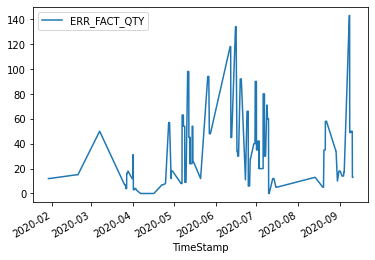

In [443]:
df_tmp2.plot()

## 없어진 row 체크

In [26]:
df_diff_labeled = df_raw_labeled.loc[df_raw_labeled.index.difference(df_prep_labeled.index).to_list()]

In [27]:
df_diff_unlabeled = df_raw_unlabeled.loc[df_raw_unlabeled.index.difference(df_prep_unlabeled.index).to_list()]

In [28]:
display(df_diff_labeled.head())
print(df_diff_labeled.shape)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.5,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.5,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.5,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.0,0.0,66.900002,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.5,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.0,0.0,66.900002,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5f89294b9c0189cc666ef5b9,2020-10-16 05:00:46,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.599998,30.900000,292.5,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.0,0.0,67.500000,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(3037, 45)


In [29]:
display(df_diff_labeled[df_diff_labeled['PassOrFail'] == 'N'])
df_diff_labeled[df_diff_labeled['PassOrFail'] == 'N'].shape

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
80,5f8932439c0189cc666f62fe,2020-10-16 05:37:29,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.60,4.48,16.920000,59.520000,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.800003,37.500000,59.299999,276.000000,275.600006,275.000000,270.100006,255.500000,230.199997,0.0,66.800003,0.0,0.0,25.200001,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,5f8933ae9c0189cc666f75e1,2020-10-16 05:45:26,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.59,4.48,16.950001,59.520000,7.13,653.419983,0.0,68.839996,647.98999,55.299999,30.700001,292.500000,141.800003,136.899994,37.299999,59.200001,276.100006,276.299988,275.200012,270.000000,254.100006,230.399994,0.0,68.500000,0.0,0.0,25.200001,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,5f89344f9c0189cc666f7e7d,2020-10-16 05:47:24,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.59,4.47,16.930000,59.560001,7.13,653.409973,0.0,68.839996,647.98999,55.500000,30.600000,292.500000,141.800003,136.600006,37.599998,59.299999,275.700012,275.399994,274.399994,270.899994,255.100006,229.699997,0.0,67.300003,0.0,0.0,25.100000,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,5f8934729c0189cc666f8064,2020-10-16 05:48:24,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.58,4.47,16.930000,59.560001,7.13,653.409973,0.0,68.839996,647.98999,55.500000,30.900000,292.500000,141.699997,136.399994,37.500000,59.299999,276.700012,274.799988,275.100006,271.299988,255.100006,229.699997,0.0,67.000000,0.0,0.0,25.200001,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,5f89349f9c0189cc666f82cc,2020-10-16 05:49:24,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.57,4.46,16.900000,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.500000,30.500000,292.500000,141.699997,136.500000,37.500000,59.299999,276.600006,275.200012,275.100006,271.399994,254.699997,230.100006,0.0,67.900002,0.0,0.0,25.100000,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,5f8934ed9c0189cc666f8704,2020-10-16 05:50:25,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.57,4.46,16.920000,59.520000,7.13,653.409973,0.0,68.839996,647.98999,55.500000,30.700001,292.399994,141.699997,136.600006,37.200001,59.200001,275.899994,274.899994,275.600006,271.000000,255.399994,230.300003,0.0,67.099998,0.0,0.0,25.100000,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,5f8935309c0189cc666f8a96,2020-10-16 05:51:23,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.56,4.44,16.920000,59.520000,7.13,653.409973,0.0,68.839996,647.98999,55.799999,30.700001,292.500000,141.600006,136.100006,37.000000,59.000000,275.200012,274.700012,274.299988,270.500000,254.699997,230.100006,0.0,67.500000,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,5f8935809c0189cc666f8eed,2020-10-16 05:53:23,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.58,4.46,16.950001,59.520000,7.14,653.409973,0.0,68.860001,647.98999,55.500000,30.900000,292.500000,141.800003,136.500000,37.099998,59.099998,277.100006,275.299988,275.100006,269.500000,255.300003,229.800003,0.0,67.800003,0.0,0.0,25.000000,27.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,5f8935d8

(26, 45)

In [30]:
df_raw_labeled.loc[80]

_id                         5f8932439c0189cc666f62fe
TimeStamp                        2020-10-16 05:37:29
PART_FACT_PLAN_DATE           2020-10-16 오전 12:00:00
PART_FACT_SERIAL                                  24
PART_NAME                      CN7 W/S SIDE MLD'G RH
EQUIP_CD                                         S14
EQUIP_NAME                                650톤-우진2호기
PassOrFail                                         N
Reason                                            가스
Injection_Time                                   9.6
Filling_Time                                    4.48
Plasticizing_Time                              16.92
Cycle_Time                                     59.52
Clamp_Close_Time                                7.13
Cushion_Position                              653.41
Switch_Over_Position                               0
Plasticizing_Position                          68.84
Clamp_Open_Position                           647.99
Max_Injection_Speed                           

In [31]:
df_raw_labeled[df_raw_labeled['Barrel_Temperature_7'] > 0]

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
3021,5f99044e9c0189cc669e4fe0,2020-10-28 05:39:57,2020-10-28 오전 12:00:00,2,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,Y,None,16.309999,3.0,10.92,66.860001,5.16,11.1,10.0,59.900002,883.700012,22.299999,27.1,25.5,134.800003,134.199997,2.8,24.5,0.0,266.700012,269.399994,270.799988,270.399994,264.299988,36.400002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5859,5f99044e9c0189cc669e4fe0,2020-10-28 05:39:57,2020-10-28 오전 12:00:00,2,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,Y,None,16.309999,3.0,10.92,66.860001,5.16,11.1,10.0,59.900002,883.700012,22.299999,27.1,25.5,134.800003,134.199997,2.8,24.5,0.0,266.700012,269.399994,270.799988,270.399994,264.299988,36.400002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_raw_labeled[df_raw_labeled['Barrel_Temperature_1'] == 0]

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
3021,5f99044e9c0189cc669e4fe0,2020-10-28 05:39:57,2020-10-28 오전 12:00:00,2,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,Y,None,16.309999,3.0,10.92,66.860001,5.16,11.1,10.0,59.900002,883.700012,22.299999,27.1,25.5,134.800003,134.199997,2.8,24.5,0.0,266.700012,269.399994,270.799988,270.399994,264.299988,36.400002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5859,5f99044e9c0189cc669e4fe0,2020-10-28 05:39:57,2020-10-28 오전 12:00:00,2,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,Y,None,16.309999,3.0,10.92,66.860001,5.16,11.1,10.0,59.900002,883.700012,22.299999,27.1,25.5,134.800003,134.199997,2.8,24.5,0.0,266.700012,269.399994,270.799988,270.399994,264.299988,36.400002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_raw_labeled.loc[5859]

_id                          5f99044e9c0189cc669e4fe0
TimeStamp                         2020-10-28 05:39:57
PART_FACT_PLAN_DATE            2020-10-28 오전 12:00:00
PART_FACT_SERIAL                                    2
PART_NAME                   SP2 CVR ROOF RACK CTR, RH
EQUIP_CD                                          S01
EQUIP_NAME                                 1800TON-우진
PassOrFail                                          Y
Reason                                           None
Injection_Time                                  16.31
Filling_Time                                        3
Plasticizing_Time                               10.92
Cycle_Time                                      66.86
Clamp_Close_Time                                 5.16
Cushion_Position                                 11.1
Switch_Over_Position                               10
Plasticizing_Position                            59.9
Clamp_Open_Position                             883.7
Max_Injection_Speed         

In [34]:
display(df_diff_unlabeled.head())
print(df_diff_unlabeled.shape)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
536813,5f914ef76e37704af8805be6,2020-08-18 06:22:15,2020-08-14 오전 12:00:00,24,9163240002,UPPER SHELL(Gamma2-T),S07,650TON-LS,6,4.03,3.90,18.16,62.87,6.71,654.06,0.0,70.74,652.99,63.5,31.2,293.5,133.3,128.0,54.8,49.8,267.1,265.4,260.5,255.5,244.6,229.7,0.0,61.3,0,0,34.9,50.0,0,0,0,0,0,0,0,0
536820,5f914ef76e37704af8805bed,2020-08-18 06:23:18,2020-08-14 오전 12:00:00,24,9163240002,UPPER SHELL(Gamma2-T),S07,650TON-LS,6,4.02,3.89,17.71,63.68,6.71,654.06,0.0,68.75,652.99,63.8,31.1,293.3,133.2,128.2,55.1,50.4,267.2,264.8,260.0,255.3,244.7,229.9,0.0,61.8,0,0,35.4,49.8,0,0,0,0,0,0,0,0
543752,5f914f946e37704af8807708,2020-08-19 09:09:44,2020-08-19 오전 12:00:00,5,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,12,11.18,6.06,16.63,63.64,7.10,653.41,0.0,68.24,646.98,46.6,30.6,292.2,145.4,143.6,40.4,61.2,271.0,275.5,274.6,270.0,255.8,230.4,0.0,61.0,0,0,33.9,51.1,0,0,0,0,0,0,0,0
543753,5f914f946e37704af8807709,2020-08-19 09:09:44,2020-08-19 오전 12:00:00,6,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,11.18,6.06,16.63,63.64,7.10,653.41,0.0,68.24,646.98,46.6,30.6,292.2,145.4,143.6,40.4,61.2,271.0,275.5,274.6,270.0,255.8,230.4,0.0,61.0,0,0,33.9,51.1,0,0,0,0,0,0,0,0
543758,5f914f946e37704af880770e,2020-08-19 09:11:12,2020-08-19 오전 12:00:00,5,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,12,10.16,5.05,16.50,65.46,7.11,653.42,0.0,68.23,647.99,49.0,30.6,292.3,143.6,140.7,48.4,66.2,271.1,274.8,275.6,269.0,255.6,230.0,0.0,61.2,0,0,34.1,50.3,0,0,0,0,0,0,0,0


(98, 45)


In [35]:
df_prep_labeled.describe()

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.0,4959.000000,4959.000000,4959.000000
mean,11.175640,7.417671,3.556431,15.855386,60.108322,7.035392,653.645300,0.528582,64.634273,482.827295,73.970196,30.730248,174.683102,142.219561,131.409498,42.521214,59.766546,278.503307,277.689050,277.430974,271.570942,257.482133,231.238335,0.0,66.512140,22.192438,23.507864
std,4.317661,3.706402,1.530365,1.722279,1.017290,0.149837,0.367358,18.605798,6.458192,280.805067,31.577542,0.151090,130.462798,1.762034,8.766322,8.064316,3.053780,4.762527,4.667865,4.691727,2.826019,4.494843,2.211718,0.0,2.261540,1.026586,1.120155
min,3.000000,1.050000,0.930000,12.800000,58.840000,6.070000,653.390015,0.000000,53.549999,4.630000,38.500000,30.299999,29.000000,140.699997,109.699997,21.700001,13.300000,244.699997,244.800003,245.000000,239.600006,235.300003,220.000000,0.0,38.400002,19.000000,20.600000
25%,9.000000,1.080000,0.950000,13.155000,59.520000,6.810000,653.429993,0.000000,53.619999,4.630000,55.299999,30.600000,29.200001,141.800003,119.099998,37.700001,59.400002,275.899994,275.100006,274.899994,269.899994,254.899994,229.899994,0.0,65.400002,21.500000,22.799999
50%,10.000000,9.540000,4.420000,16.790001,59.520000,7.120000,653.440002,0.000000,68.339996,647.989990,55.900002,30.700001,290.500000,142.100006,136.300003,38.099998,59.700001,276.299988,275.399994,275.100006,270.899994,255.100006,230.100006,0.0,66.599998,22.100000,23.500000
75%,13.000000,9.580000,4.470000,16.910000,61.720001,7.120000,654.229980,0.000000,68.489998,647.989990,127.099998,30.799999,292.399994,142.399994,136.699997,55.400002,60.099998,284.899994,284.399994,284.299988,274.100006,264.250000,234.500000,0.0,67.699997,22.900000,24.200001
max,24.000000,13.390000,8.270000,21.120001,64.349998,7.180000,655.080017,655.309998,68.860001,647.989990,128.500000,31.200001,293.899994,183.199997,146.699997,75.199997,90.800003,287.100006,286.500000,285.799988,276.799988,266.399994,235.500000,0.0,70.599998,25.200001,27.500000


In [36]:
df_prep_labeled[df_prep_labeled['Switch_Over_Position'] != 0]

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
1697,5f9126069c0189cc667ae981,2020-10-22 06:25:25,2020-10-22 오전 12:00:00,9,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.06,0.94,12.90,61.779999,6.81,654.26001,655.309998,53.580002,4.63,128.300003,30.900000,290.500000,142.600006,109.699997,56.099998,61.0,285.500000,285.000000,285.100006,276.0,265.200012,235.100006,0.0,66.300003,22.700001,23.700001
1698,5f9126079c0189cc667ae986,2020-10-22 06:25:25,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,None,1.06,0.94,12.90,61.779999,6.81,654.26001,655.309998,53.580002,4.63,128.300003,30.900000,290.500000,142.600006,109.699997,56.099998,61.0,285.500000,285.000000,285.100006,276.0,265.200012,235.100006,0.0,66.300003,22.700001,23.700001
1869,5f913b7b9c0189cc667b9a21,2020-10-22 07:57:04,2020-10-22 오전 12:00:00,9,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.06,0.94,12.94,61.779999,6.81,654.26001,655.309998,53.570000,4.63,128.300003,30.799999,290.600006,142.699997,110.000000,55.900002,60.5,285.600006,285.200012,285.000000,275.0,265.399994,234.699997,0.0,65.699997,22.799999,23.900000
1870,5f913b7c9c0189cc667b9a2c,2020-10-22 07:57:04,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,None,1.06,0.94,12.94,61.779999,6.81,654.26001,655.309998,53.570000,4.63,128.300003,30.799999,290.600006,142.699997,110.000000,55.900002,60.5,285.600006,285.200012,285.000000,275.0,265.399994,234.699997,0.0,65.699997,22.799999,23.900000


In [37]:
tmp = df_raw_labeled[df_raw_labeled.duplicated(subset=['_id'])]

In [38]:
tmp

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
5232,5f97659b9c0189cc668ea68e,2020-10-27 00:10:40,2020-10-27 오전 12:00:00,9,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.64,4.52,16.740000,59.580002,7.12,653.450012,0.0,68.589996,647.98999,54.900002,30.700001,292.399994,142.199997,137.000000,38.400002,59.900002,275.899994,275.600006,274.299988,269.700012,255.399994,229.600006,0.0,65.300003,0.0,0.0,19.600000,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5233,5f9765ef9c0189cc668ea838,2020-10-27 00:11:38,2020-10-27 오전 12:00:00,9,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.64,4.53,16.740000,59.619999,7.12,653.440002,0.0,68.589996,647.98999,54.799999,30.700001,292.299988,142.199997,137.399994,38.400002,59.900002,275.899994,274.899994,275.000000,270.500000,254.899994,229.500000,0.0,64.199997,0.0,0.0,19.600000,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5234,5f9765f09c0189cc668ea83f,2020-10-27 00:11:38,2020-10-27 오전 12:00:00,10,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.64,4.53,16.740000,59.619999,7.12,653.440002,0.0,68.589996,647.98999,54.799999,30.700001,292.299988,142.199997,137.399994,38.400002,59.900002,275.899994,274.899994,275.000000,270.500000,254.899994,229.500000,0.0,64.199997,0.0,0.0,19.600000,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5235,5f97661e9c0189cc668ea9cc,2020-10-27 00:12:38,2020-10-27 오전 12:00:00,10,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.64,4.52,16.740000,59.599998,7.12,653.450012,0.0,68.589996,647.98999,54.900002,30.799999,292.399994,142.199997,137.199997,38.500000,60.000000,275.899994,275.299988,275.000000,271.100006,255.000000,230.000000,0.0,64.599998,0.0,0.0,19.700001,21.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5236,5f97661f9c0189cc668ea9d4,2020-10-27 00:12:38,2020-10-27 오전 12:00:00,9,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.64,4.52,16.740000,59.599998,7.12,653.450012,0.0,68.589996,647.98999,54.900002,30.799999,292.399994,142.199997,137.199997,38.500000,60.000000,275.899994,275.299988,275.000000,271.100006,255.000000,230.000000,0.0,64.599998,0.0,0.0,19.700001,21.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29

In [39]:
tmp[tmp['_id'] == '5f97659b9c0189cc668ea68e']

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
5232,5f97659b9c0189cc668ea68e,2020-10-27 00:10:40,2020-10-27 오전 12:00:00,9,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.64,4.52,16.74,59.580002,7.12,653.450012,0.0,68.589996,647.98999,54.900002,30.700001,292.399994,142.199997,137.0,38.400002,59.900002,275.899994,275.600006,274.299988,269.700012,255.399994,229.600006,0.0,65.300003,0.0,0.0,19.6,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_tmp = df_raw_labeled.drop_duplicates()

In [41]:
df_tmp.shape

(5232, 45)

In [42]:
df_raw_labeled.shape

(7996, 45)

In [43]:
df_raw_labeled[df_raw_labeled['_id'] == '5fa112bc9c0189cc66dac23a']

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
5157,5fa112bc9c0189cc66dac23a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.6,4.48,16.629999,59.580002,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,136.899994,38.400002,59.900002,276.100006,275.799988,275.0,271.299988,255.100006,230.199997,0.0,65.199997,0.0,0.0,21.0,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7995,5fa112bc9c0189cc66dac23a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.6,4.48,16.629999,59.580002,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,136.899994,38.400002,59.900002,276.100006,275.799988,275.0,271.299988,255.100006,230.199997,0.0,65.199997,0.0,0.0,21.0,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_raw_labeled.loc[5157]

_id                         5fa112bc9c0189cc66dac23a
TimeStamp                        2020-11-03 08:19:35
PART_FACT_PLAN_DATE           2020-11-03 오전 12:00:00
PART_FACT_SERIAL                                   7
PART_NAME                      CN7 W/S SIDE MLD'G RH
EQUIP_CD                                         S14
EQUIP_NAME                                650톤-우진2호기
PassOrFail                                         Y
Reason                                          None
Injection_Time                                   9.6
Filling_Time                                    4.48
Plasticizing_Time                              16.63
Cycle_Time                                     59.58
Clamp_Close_Time                                7.11
Cushion_Position                              653.43
Switch_Over_Position                               0
Plasticizing_Position                          68.33
Clamp_Open_Position                           647.99
Max_Injection_Speed                           

In [45]:
df_raw_labeled.loc[7995]

_id                         5fa112bc9c0189cc66dac23a
TimeStamp                        2020-11-03 08:19:35
PART_FACT_PLAN_DATE           2020-11-03 오전 12:00:00
PART_FACT_SERIAL                                   7
PART_NAME                      CN7 W/S SIDE MLD'G RH
EQUIP_CD                                         S14
EQUIP_NAME                                650톤-우진2호기
PassOrFail                                         Y
Reason                                          None
Injection_Time                                   9.6
Filling_Time                                    4.48
Plasticizing_Time                              16.63
Cycle_Time                                     59.58
Clamp_Close_Time                                7.11
Cushion_Position                              653.43
Switch_Over_Position                               0
Plasticizing_Position                          68.33
Clamp_Open_Position                           647.99
Max_Injection_Speed                           

In [46]:
df_prep_labeled = df_prep_labeled.drop(columns=remove_nunique(df_prep_labeled))

In [47]:
df_prep_labeled.corr()

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
PART_FACT_SERIAL,1.000000,0.049798,0.041817,0.110219,-0.032499,0.033413,-0.041807,-0.011028,0.053728,0.040788,-0.044021,0.010220,0.173395,0.008551,0.040919,-0.067390,-0.108581,-0.070368,-0.067385,-0.067411,-0.082229,-0.062370,-0.058503,0.278640,0.465651,0.421861
Injection_Time,0.049798,1.000000,0.996465,0.989230,-0.942099,0.894415,-0.955855,-0.048741,0.993323,0.987642,-0.998460,-0.481482,-0.447498,-0.120117,0.995063,-0.984507,-0.246001,-0.920302,-0.944204,-0.947313,-0.793618,-0.979164,-0.985611,0.234296,-0.216489,-0.164787
Filling_Time,0.041817,0.996465,1.000000,0.979347,-0.958728,0.922760,-0.971565,-0.048581,0.997381,0.994456,-0.998573,-0.471065,-0.440324,-0.178420,0.998318,-0.972215,-0.178121,-0.891391,-0.919855,-0.923376,-0.754954,-0.963581,-0.974935,0.280676,-0.210368,-0.164910
Plasticizing_Time,0.110219,0.989230,0.979347,1.000000,-0.910308,0.852013,-0.923363,-0.048430,0.976344,0.965644,-0.984887,-0.472742,-0.404654,-0.037129,0.977189,-0.984150,-0.330624,-0.945711,-0.964571,-0.966910,-0.837244,-0.987610,-0.988351,0.207604,-0.183750,-0.138474
Cycle_Time,-0.032499,-0.942099,-0.958728,-0.910308,1.000000,-0.982892,0.993104,0.046694,-0.971916,-0.980854,0.955577,0.425757,0.418312,0.418360,-0.961386,0.913698,-0.027493,0.752716,0.796330,0.801141,0.587174,0.870267,0.895364,-0.472290,0.160972,0.152450
Clamp_Close_Time,0.033413,0.894415,0.922760,0.852013,-0.982892,1.000000,-0.983785,-0.042744,0.938144,0.952650,-0.913837,-0.385997,-0.368241,-0.529967,0.925788,-0.842431,0.181264,-0.660082,-0.710509,-0.716109,-0.478594,-0.799523,-0.833108,0.562333,-0.139708,-0.151220
Cushion_Position,-0.041807,-0.955855,-0.971565,-0.923363,0.993104,-0.983785,1.000000,0.047548,-0.981678,-0.989533,0.967420,0.416447,0.413287,0.397988,-0.974690,0.916190,-0.030214,0.771589,0.813184,0.818072,0.604752,0.884873,0.908813,-0.456087,0.156640,0.141680
Switch_Over_Position,-0.011028,-0.048741,-0.048581,-0.048430,0.046694,-0.042744,0.047548,1.000000,-0.048659,-0.048390,0.048889,0.022521,0.025236,0.006941,-0.069883,0.047494,0.009151,0.042044,0.045114,0.046144,0.039506,0.049423,0.047044,-0.006435,0.015433,0.007411
Plasticizing_Position,0.053728,0.993323,0.997381,0.976344,-0.971916,0.938144,-0.981678,-0.048659,1.000000,0.998663,-0.997579,-0.465296,-0.430444,-0.220653,0.997503,-0.969947,-0.149124,-0.875642,-0.906745,-0.910512,-0.733876,-0.955472,-0.968772,0.319564,-0.192247,-0.153759
Clamp_Open_Position,0.040788,0.987642,0.994456,0.965644,-0.980854,0.952650,-0.989533,-0.048390,0.998663,1.000000,-0.993574,-0.459660,-0.438038,-0.267019,0.995190,-0.960403,-0.104813,-0.852517,-0.886278,-0.890339,-0.703601,-0.940964,-0.956901,0.352246,-0.194715,-0.162385


In [48]:
df_prep_labeled.describe()

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,11.175640,7.417671,3.556431,15.855386,60.108322,7.035392,653.645300,0.528582,64.634273,482.827295,73.970196,30.730248,174.683102,142.219561,131.409498,42.521214,59.766546,278.503307,277.689050,277.430974,271.570942,257.482133,231.238335,66.512140,22.192438,23.507864
std,4.317661,3.706402,1.530365,1.722279,1.017290,0.149837,0.367358,18.605798,6.458192,280.805067,31.577542,0.151090,130.462798,1.762034,8.766322,8.064316,3.053780,4.762527,4.667865,4.691727,2.826019,4.494843,2.211718,2.261540,1.026586,1.120155
min,3.000000,1.050000,0.930000,12.800000,58.840000,6.070000,653.390015,0.000000,53.549999,4.630000,38.500000,30.299999,29.000000,140.699997,109.699997,21.700001,13.300000,244.699997,244.800003,245.000000,239.600006,235.300003,220.000000,38.400002,19.000000,20.600000
25%,9.000000,1.080000,0.950000,13.155000,59.520000,6.810000,653.429993,0.000000,53.619999,4.630000,55.299999,30.600000,29.200001,141.800003,119.099998,37.700001,59.400002,275.899994,275.100006,274.899994,269.899994,254.899994,229.899994,65.400002,21.500000,22.799999
50%,10.000000,9.540000,4.420000,16.790001,59.520000,7.120000,653.440002,0.000000,68.339996,647.989990,55.900002,30.700001,290.500000,142.100006,136.300003,38.099998,59.700001,276.299988,275.399994,275.100006,270.899994,255.100006,230.100006,66.599998,22.100000,23.500000
75%,13.000000,9.580000,4.470000,16.910000,61.720001,7.120000,654.229980,0.000000,68.489998,647.989990,127.099998,30.799999,292.399994,142.399994,136.699997,55.400002,60.099998,284.899994,284.399994,284.299988,274.100006,264.250000,234.500000,67.699997,22.900000,24.200001
max,24.000000,13.390000,8.270000,21.120001,64.349998,7.180000,655.080017,655.309998,68.860001,647.989990,128.500000,31.200001,293.899994,183.199997,146.699997,75.199997,90.800003,287.100006,286.500000,285.799988,276.799988,266.399994,235.500000,70.599998,25.200001,27.500000


In [49]:
for i in df_prep_labeled.columns:
    display(i,df_prep_labeled[i].unique(),df_prep_labeled[i].nunique())

'_id'

array(['5f8928bb9c0189cc666ef19b', '5f8929a89c0189cc666ef8fe',
       '5f8929a99c0189cc666ef908', ..., '5fa36afd9c0189cc66eebe41',
       '5fa36b009c0189cc66eebed7', '5fa4d0ce9c0189cc66fc7a13'],
      dtype=object)

4959

'TimeStamp'

array(['2020-10-16 04:57:47', '2020-10-16 05:02:46',
       '2020-10-16 05:05:45', ..., '2020-11-04 05:43:29',
       '2020-11-05 03:00:02', '2020-11-06 04:27:38'], dtype=object)

2488

'PART_FACT_PLAN_DATE'

array(['2020-10-16 오전 12:00:00', '2020-10-20 오전 12:00:00',
       '2020-10-21 오전 12:00:00', '2020-10-22 오전 12:00:00',
       '2020-10-23 오전 12:00:00', '2020-10-27 오전 12:00:00',
       '2020-10-29 오전 12:00:00', '2020-10-30 오전 12:00:00',
       '2020-11-03 오전 12:00:00', '2020-11-04 오전 12:00:00',
       '2020-11-05 오전 12:00:00', '2020-11-06 오전 12:00:00'], dtype=object)

12

'PART_FACT_SERIAL'

array([24, 23, 13, 14, 17, 18,  9, 10, 12, 11, 21, 22,  6,  7,  3,  4],
      dtype=int64)

16

'PART_NAME'

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       "JX1 W/S SIDE MLD'G RH"], dtype=object)

5

'EQUIP_CD'

array(['S14', 'S12'], dtype=object)

2

'EQUIP_NAME'

array(['650톤-우진2호기', '650톤-우진'], dtype=object)

2

'PassOrFail'

array(['Y', 'N'], dtype=object)

2

'Reason'

array(['None', '가스', '미성형', '초기허용불량'], dtype=object)

4

'Injection_Time'

array([ 9.59000015,  9.56999969,  9.57999992,  9.56000042,  9.60000038,
        9.53999996,  9.52999973,  9.55000019,  9.52000046,  9.51000023,
        9.5       ,  9.43000031,  9.35999966,  1.05999994,  1.04999995,
        1.07000005,  9.64000034,  9.63000011,  9.61999989,  9.60999966,
       13.39000034, 10.82999992, 11.48999977,  9.97999954,  9.69999981,
        9.64999962, 11.47999954, 11.47000027,  9.48999977, 11.46000004,
        9.93999958,  4.11999989,  1.08000004])

33

'Filling_Time'

array([4.46999979, 4.44999981, 4.46000004, 4.48000002, 4.44000006,
       4.42999983, 4.42000008, 4.40999985, 4.4000001 , 4.38999987,
       4.32000017, 4.23999977, 0.93000001, 0.94      , 4.51999998,
       4.53000021, 4.51000023, 4.5       , 4.48999977, 8.27000046,
       5.71999979, 6.36999989, 4.86999989, 4.57999992, 3.3599999 ,
       3.36999989, 4.38000011, 3.3499999 , 4.82000017, 4.36999989,
       3.99000001, 0.95999998, 0.94999999])

33

'Plasticizing_Time'

array([16.92000008, 16.90999985, 16.95000076, 16.89999962, 16.88999939,
       16.87999916, 16.87000084, 16.93000031, 16.94000053, 16.95999908,
       16.97999954, 16.96999931, 16.98999977, 17.        , 17.01000023,
       17.02000046, 17.04000092, 17.03000069, 17.04999924, 17.05999947,
       17.07999992, 17.06999969, 17.09000015, 17.10000038, 17.11000061,
       17.12000084, 17.12999916, 17.14999962, 17.13999939, 17.26000023,
       17.51000023, 18.15999985, 19.02000046, 21.10000038, 13.01000023,
       12.98999977, 12.94999981, 13.02000046, 12.97000027, 13.06000042,
       13.        , 12.96000004, 13.03999996, 12.93000031, 13.06999969,
       12.97999954, 13.09000015, 12.93999958, 12.89000034, 12.92000008,
       12.86999989, 12.90999985, 12.89999962, 13.02999973, 12.88000011,
       12.85000038, 12.82999992, 12.85999966, 12.84000015, 12.80000019,
       12.81000042, 16.73999977, 16.78000069, 16.75      , 16.72999954,
       16.71999931, 16.77000046, 16.79000092, 16.70999908, 16.52

120

'Cycle_Time'

array([59.52000046, 59.56000137, 59.58000183, 59.54000092, 59.47999954,
       59.45999908, 59.5       , 59.43999863, 59.36000061, 61.77999878,
       61.75999832, 61.75      , 61.77000046, 61.72999954, 61.72000122,
       61.79999924, 61.74000168, 62.20000076, 61.97999954, 59.61999893,
       59.59999847, 62.36000061, 60.45999908, 58.95999908, 64.34999847,
       64.30999756, 64.31999969, 64.29000092, 59.95999908, 64.30000305,
       59.75999832, 59.86000061, 59.45000076, 59.47000122, 64.33000183,
       59.41999817, 61.90000153, 58.84000015, 59.65999985, 59.93999863,
       62.18000031, 59.70000076, 60.        , 61.70999908, 61.95999908])

45

'Clamp_Close_Time'

array([7.13000011, 7.13999987, 7.11999989, 6.80999994, 6.80000019,
       6.78999996, 7.17999983, 7.11000013, 6.07000017, 6.07999992,
       6.09000015, 6.69000006])

12

'Cushion_Position'

array([653.40997314, 653.41998291, 653.42999268, 653.45001221,
       654.28997803, 654.2800293 , 654.27001953, 654.26000977,
       654.23999023, 654.25      , 654.22998047, 653.44000244,
       653.46002197, 653.63000488, 653.4699707 , 653.39001465,
       655.        , 655.08001709, 654.2199707 , 654.21002197])

20

'Switch_Over_Position'

array([  0.        , 655.30999756])

2

'Plasticizing_Position'

array([68.84999847, 68.83000183, 68.83999634, 68.86000061, 68.48000336,
       68.48999786, 68.5       , 68.51000214, 68.47000122, 68.44000244,
       68.40000153, 68.34999847, 68.12000275, 53.56000137, 53.58000183,
       53.56999969, 53.54999924, 53.59999847, 53.61999893, 53.61000061,
       53.59000015, 68.58999634, 68.59999847, 68.61000061, 68.58000183,
       68.56999969, 59.83000183, 59.81999969, 59.84000015, 68.44999695,
       68.25      , 68.26000214, 68.23999786, 68.26999664, 59.75999832,
       59.77000046, 59.79000092, 68.27999878, 68.23000336, 68.33000183,
       68.33999634, 68.31999969, 68.36000061, 64.51999664, 68.37000275,
       53.63000107, 53.66999817, 53.65999985])

48

'Clamp_Open_Position'

array([647.98999023,   4.63000011,  69.63999939,  76.62999725])

4

'Max_Injection_Speed'

array([ 55.40000153,  55.70000076,  55.5       ,  55.79999924,
        55.59999847,  55.20000076,  55.29999924,  56.        ,
        56.09999847,  55.90000153,  56.20000076,  56.29999924,
        56.40000153,  56.5       ,  57.20000076,  58.79999924,
        60.5       , 128.5       , 128.3999939 , 128.30000305,
       128.19999695, 128.1000061 , 128.        , 127.90000153,
        54.90000153,  54.79999924,  55.        ,  55.09999847,
        38.5       ,  45.40000153,  45.09999847,  49.40000153,
        53.29999924,  64.5       ,  64.59999847,  64.69999695,
        49.29999924,  53.70000076,  54.70000076,  64.80000305,
        49.        ,  54.59999847,  54.5       , 126.80000305,
       127.09999847, 127.19999695, 127.        , 127.30000305,
       127.40000153, 127.5       , 127.59999847])

51

'Max_Screw_RPM'

array([30.70000076, 30.79999924, 30.60000038, 30.89999962, 31.        ,
       30.5       , 31.10000038, 31.20000076, 30.39999962, 30.29999924])

10

'Average_Screw_RPM'

array([292.5       , 292.3999939 , 292.6000061 , 292.70001221,
       293.        , 293.3999939 , 293.8999939 , 290.5       ,
       290.70001221, 290.6000061 , 290.3999939 , 292.29998779,
        29.20000076,  29.39999962,  29.        ])

15

'Max_Injection_Pressure'

array([141.80000305, 141.6000061 , 141.69999695, 141.5       ,
       141.8999939 , 141.19999695, 140.69999695, 142.30000305,
       142.3999939 , 142.5       , 142.19999695, 142.6000061 ,
       142.1000061 , 142.69999695, 142.80000305, 142.8999939 ,
       143.        , 147.3999939 , 142.        , 144.8999939 ,
       145.69999695, 168.8999939 , 169.1000061 , 169.        ,
       168.80000305, 183.19999695, 143.8999939 , 143.5       ,
       143.6000061 , 143.3999939 , 143.30000305, 143.19999695,
       143.1000061 ])

33

'Max_Switch_Over_Pressure'

array([136.80000305, 136.3999939 , 136.69999695, 136.1000061 ,
       135.8999939 , 136.19999695, 136.30000305, 136.8999939 ,
       136.6000061 , 136.5       , 137.        , 137.1000061 ,
       136.        , 135.69999695, 135.80000305, 134.6000061 ,
       133.1000061 , 115.69999695, 115.80000305, 116.        ,
       116.19999695, 116.09999847, 115.90000153, 116.30000305,
       116.40000153, 116.59999847, 116.5       , 115.59999847,
       109.69999695, 110.        , 116.69999695, 116.80000305,
       117.        , 116.90000153, 137.3999939 , 137.19999695,
       137.30000305, 146.69999695, 142.69999695, 144.19999695,
       139.        , 129.        , 129.19999695, 128.80000305,
       128.8999939 , 128.6000061 , 128.5       , 129.1000061 ,
       135.6000061 , 128.3999939 , 138.80000305, 126.40000153,
       120.30000305, 119.09999847, 119.19999695, 119.30000305,
       119.40000153, 119.        , 118.80000305, 118.90000153,
       118.69999695, 118.59999847, 118.5       , 118.40

68

'Max_Back_Pressure'

array([37.40000153, 37.09999847, 37.        , 37.70000076, 37.5       ,
       37.20000076, 36.90000153, 37.59999847, 37.29999924, 36.79999924,
       38.40000153, 38.29999924, 38.20000076, 38.09999847, 38.59999847,
       38.79999924, 38.70000076, 38.5       , 38.        , 37.90000153,
       37.79999924, 55.59999847, 55.70000076, 55.79999924, 55.5       ,
       55.40000153, 55.90000153, 56.        , 56.09999847, 56.20000076,
       56.29999924, 56.40000153, 55.29999924, 55.20000076, 56.5       ,
       56.70000076, 56.59999847, 71.90000153, 43.70000076, 50.59999847,
       22.29999924, 22.10000038, 22.        , 21.89999962, 21.70000076,
       22.39999962, 22.20000076, 21.79999924, 75.19999695, 39.29999924,
       40.40000153, 59.09999847, 58.        , 58.29999924, 57.79999924,
       58.09999847, 58.20000076, 57.70000076, 57.90000153, 57.59999847,
       57.5       , 57.40000153, 57.09999847])

63

'Average_Back_Pressure'

array([59.29999924, 59.09999847, 59.40000153, 59.20000076, 59.        ,
       58.90000153, 59.70000076, 59.59999847, 59.5       , 59.79999924,
       59.90000153, 58.59999847, 57.70000076, 60.29999924, 60.5       ,
       60.20000076, 60.40000153, 60.        , 60.70000076, 60.59999847,
       60.79999924, 60.90000153, 60.09999847, 61.        , 61.09999847,
       61.20000076, 61.29999924, 61.40000153, 61.5       , 61.59999847,
       61.79999924, 61.70000076, 87.09999847, 62.90000153, 67.40000153,
       13.5       , 13.39999962, 13.30000019, 90.80000305, 20.20000076,
       64.        , 62.79999924, 62.09999847, 62.5       , 62.70000076,
       62.40000153, 62.20000076, 62.29999924, 62.        , 61.90000153])

50

'Barrel_Temperature_1'

array([276.5       , 275.70001221, 276.1000061 , 276.8999939 ,
       276.20001221, 275.6000061 , 276.3999939 , 276.79998779,
       276.29998779, 277.20001221, 275.5       , 275.79998779,
       276.6000061 , 276.        , 275.3999939 , 275.8999939 ,
       277.        , 276.70001221, 275.1000061 , 277.1000061 ,
       275.20001221, 275.29998779, 277.3999939 , 277.6000061 ,
       286.        , 286.20001221, 286.5       , 285.29998779,
       286.29998779, 285.6000061 , 285.20001221, 286.1000061 ,
       285.3999939 , 285.5       , 286.6000061 , 286.3999939 ,
       285.70001221, 285.8999939 , 285.79998779, 284.8999939 ,
       285.1000061 , 287.1000061 , 286.79998779, 286.70001221,
       287.        , 285.        , 286.8999939 , 284.6000061 ,
       284.79998779, 274.79998779, 277.5       , 275.        ,
       245.3999939 , 245.30000305, 245.19999695, 244.69999695,
       245.        , 277.29998779, 244.80000305, 244.8999939 ,
       274.8999939 , 245.80000305, 245.1000061 , 277.79

66

'Barrel_Temperature_2'

array([274.70001221, 274.8999939 , 275.        , 275.1000061 ,
       274.79998779, 275.20001221, 275.3999939 , 276.        ,
       275.5       , 275.6000061 , 275.29998779, 275.70001221,
       275.8999939 , 276.29998779, 275.79998779, 274.29998779,
       276.1000061 , 274.6000061 , 274.5       , 274.20001221,
       276.5       , 274.3999939 , 276.20001221, 285.        ,
       285.79998779, 285.1000061 , 285.5       , 285.8999939 ,
       284.70001221, 285.29998779, 286.        , 284.79998779,
       284.8999939 , 285.20001221, 285.3999939 , 285.70001221,
       284.5       , 284.6000061 , 286.20001221, 284.3999939 ,
       285.6000061 , 286.1000061 , 284.29998779, 286.5       ,
       286.29998779, 249.69999695, 249.6000061 , 249.8999939 ,
       250.        , 249.80000305, 250.1000061 , 249.5       ,
       249.        , 250.19999695, 250.5       , 250.3999939 ,
       274.1000061 , 244.80000305])

58

'Barrel_Temperature_3'

array([274.79998779, 275.29998779, 275.1000061 , 274.5       ,
       275.3999939 , 275.70001221, 275.        , 274.8999939 ,
       274.6000061 , 275.20001221, 275.5       , 274.70001221,
       274.29998779, 274.3999939 , 275.79998779, 275.6000061 ,
       274.1000061 , 274.20001221, 276.        , 285.        ,
       284.5       , 285.6000061 , 284.8999939 , 284.6000061 ,
       285.1000061 , 284.3999939 , 285.20001221, 284.70001221,
       285.3999939 , 285.5       , 284.79998779, 285.29998779,
       285.79998779, 285.70001221, 284.29998779, 284.20001221,
       249.6000061 , 249.8999939 , 250.        , 250.3999939 ,
       249.80000305, 250.30000305, 250.1000061 , 245.        ])

44

'Barrel_Temperature_4'

array([269.20001221, 270.79998779, 269.        , 269.29998779,
       271.6000061 , 271.79998779, 271.8999939 , 271.20001221,
       270.70001221, 270.1000061 , 269.5       , 269.70001221,
       271.        , 271.3999939 , 270.3999939 , 269.79998779,
       270.        , 270.29998779, 270.20001221, 268.8999939 ,
       269.8999939 , 269.3999939 , 269.1000061 , 271.1000061 ,
       271.29998779, 271.5       , 270.5       , 270.8999939 ,
       269.6000061 , 270.6000061 , 271.70001221, 272.3999939 ,
       272.20001221, 268.79998779, 272.        , 275.3999939 ,
       275.6000061 , 276.        , 274.8999939 , 274.5       ,
       274.6000061 , 275.1000061 , 275.70001221, 276.1000061 ,
       275.79998779, 275.29998779, 274.1000061 , 274.70001221,
       275.        , 275.20001221, 275.5       , 274.79998779,
       275.8999939 , 276.20001221, 276.6000061 , 274.29998779,
       274.3999939 , 274.20001221, 276.29998779, 276.5       ,
       274.        , 276.3999939 , 276.79998779, 276.70

79

'Barrel_Temperature_5'

array([255.        , 255.3999939 , 254.8999939 , 254.5       ,
       255.30000305, 255.1000061 , 254.80000305, 255.8999939 ,
       255.80000305, 254.3999939 , 255.19999695, 254.6000061 ,
       255.69999695, 255.6000061 , 255.5       , 256.1000061 ,
       254.30000305, 256.        , 254.69999695, 254.19999695,
       265.1000061 , 265.6000061 , 264.79998779, 265.        ,
       264.70001221, 264.8999939 , 265.70001221, 265.3999939 ,
       265.20001221, 264.6000061 , 265.5       , 264.29998779,
       265.29998779, 265.8999939 , 266.3999939 , 264.20001221,
       264.5       , 265.79998779, 266.        , 264.3999939 ,
       263.6000061 , 253.8999939 , 254.1000061 , 253.6000061 ,
       240.        , 240.1000061 , 256.29998779, 240.19999695,
       240.30000305, 239.8999939 , 239.69999695, 253.80000305,
       235.30000305, 254.        , 253.5       ])

55

'Barrel_Temperature_6'

array([229.69999695, 230.1000061 , 230.        , 229.6000061 ,
       230.19999695, 230.30000305, 229.80000305, 229.8999939 ,
       230.3999939 , 229.3999939 , 230.5       , 229.5       ,
       230.6000061 , 234.8999939 , 234.80000305, 234.69999695,
       235.19999695, 234.3999939 , 235.        , 235.1000061 ,
       234.5       , 235.30000305, 234.6000061 , 235.5       ,
       235.3999939 , 229.30000305, 230.69999695, 224.6000061 ,
       225.1000061 , 225.19999695, 225.        , 224.69999695,
       224.8999939 , 229.19999695, 228.80000305, 220.        ])

36

'Hopper_Temperature'

array([66.30000305, 66.69999695, 66.90000153, 67.59999847, 67.09999847,
       67.5       , 67.        , 66.19999695, 67.80000305, 68.09999847,
       66.5       , 66.59999847, 67.19999695, 66.80000305, 68.19999695,
       67.30000305, 66.40000153, 67.69999695, 67.40000153, 68.5       ,
       68.90000153, 68.59999847, 66.09999847, 68.30000305, 68.        ,
       68.80000305, 68.40000153, 67.90000153, 68.69999695, 69.        ,
       69.09999847, 69.30000305, 69.19999695, 69.5       , 69.59999847,
       69.90000153, 69.69999695, 69.80000305, 70.        , 69.40000153,
       70.30000305, 70.40000153, 70.09999847, 70.19999695, 70.59999847,
       70.5       , 65.80000305, 65.90000153, 65.        , 65.19999695,
       65.5       , 66.        , 64.90000153, 65.30000305, 65.69999695,
       65.59999847, 65.09999847, 64.59999847, 64.5       , 65.40000153,
       62.90000153, 64.69999695, 63.20000076, 63.        , 63.40000153,
       63.70000076, 64.80000305, 64.40000153, 63.79999924, 63.90

93

'Mold_Temperature_3'

array([24.79999924, 24.70000076, 24.89999962, 25.        , 25.20000076,
       25.10000038, 20.79999924, 20.70000076, 20.89999962, 21.        ,
       21.10000038, 21.20000076, 21.29999924, 21.39999962, 21.5       ,
       21.60000038, 21.70000076, 21.79999924, 22.        , 22.10000038,
       22.20000076, 22.29999924, 22.39999962, 22.5       , 22.60000038,
       22.70000076, 22.79999924, 22.89999962, 23.        , 23.10000038,
       23.20000076, 23.29999924, 23.39999962, 23.5       , 23.60000038,
       23.70000076, 23.79999924, 23.89999962, 21.89999962, 19.60000038,
       19.70000076, 19.79999924, 20.20000076, 20.29999924, 20.39999962,
       20.60000038, 20.5       , 19.20000076, 19.10000038, 20.10000038,
       19.89999962, 20.        , 19.39999962, 19.        ])

54

'Mold_Temperature_4'

array([27.5       , 27.39999962, 27.29999924, 21.79999924, 21.70000076,
       21.60000038, 21.89999962, 22.        , 22.10000038, 22.20000076,
       22.39999962, 22.29999924, 22.5       , 22.60000038, 22.79999924,
       22.70000076, 22.89999962, 23.        , 23.10000038, 23.20000076,
       23.29999924, 23.39999962, 23.5       , 23.60000038, 23.70000076,
       23.79999924, 23.89999962, 24.        , 24.10000038, 24.20000076,
       24.29999924, 24.39999962, 24.5       , 24.60000038, 24.70000076,
       24.79999924, 24.89999962, 25.        , 25.20000076, 25.10000038,
       25.29999924, 21.        , 21.10000038, 21.20000076, 21.5       ,
       21.29999924, 21.39999962, 20.70000076, 20.79999924, 20.60000038,
       20.89999962])

51

In [50]:
df_prep_labeled[df_prep_labeled['PassOrFail'] == 'N']

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
47,5f892e139c0189cc666f2c8c,2020-10-16 05:21:38,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,N,가스,9.58,4.47,16.889999,59.520000,7.13,653.409973,0.0,68.839996,647.98999,55.400002,30.600000,292.500000,141.800003,136.600006,37.599998,59.400002,276.100006,275.200012,275.100006,271.399994,255.199997,230.199997,67.800003,25.000000,27.500000
109,5f8935769c0189cc666f8e5c,2020-10-16 05:52:23,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,N,가스,9.56,4.45,16.920000,59.520000,7.14,653.409973,0.0,68.839996,647.98999,55.799999,30.900000,292.500000,141.699997,136.199997,37.099998,59.099998,276.200012,275.200012,275.200012,270.000000,255.100006,230.399994,67.099998,24.799999,27.500000
1347,5f90d81f9c0189cc667a38c2,2020-10-22 00:51:52,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,가스,1.06,0.93,12.920000,61.779999,6.80,654.260010,0.0,53.580002,4.63000,128.300003,30.700001,290.500000,142.500000,115.900002,55.599998,60.400002,286.200012,284.399994,285.299988,274.799988,265.399994,234.800003,66.800003,21.799999,23.000000
1371,5f90dabe9c0189cc667a3ce9,2020-10-22 01:04:15,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,가스,1.06,0.93,12.940000,61.779999,6.80,654.260010,0.0,53.580002,4.63000,128.300003,30.900000,290.500000,142.399994,116.300003,55.799999,60.400002,285.899994,285.500000,284.799988,275.000000,264.799988,234.600006,65.699997,22.000000,23.100000
1381,5f90dc009c0189cc667a4f4e,2020-10-22 01:09:23,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,미성형,1.06,0.93,12.960000,61.779999,6.80,654.270020,0.0,53.590000,4.63000,128.300003,30.799999,290.500000,142.500000,116.000000,56.000000,61.000000,286.100006,285.299988,285.000000,275.899994,265.000000,235.000000,66.000000,22.000000,23.000000
1415,5f90e0209c0189cc667a5b80,2020-10-22 01:26:54,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,가스,1.06,0.93,12.900000,61.779999,6.80,654.260010,0.0,53.590000,4.63000,128.300003,30.799999,290.600006,142.399994,116.099998,56.200001,61.000000,286.600006,284.600006,285.000000,276.500000,264.899994,235.000000,66.800003,22.000000,23.100000
1455,5f90e73d9c0189cc667a6714,2020-10-22 01:57:47,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,가스,1.06,0.93,12.940000,61.779999,6.80,654.270020,0.0,53.580002,4.63000,128.399994,31.000000,290.600006,142.399994,115.800003,55.900002,60.599998,286.299988,285.399994,284.899994,276.299988,265.200012,234.800003,65.900002,22.000000,23.100000
1511,5f910ed59c0189cc667ab13d,2020-10-22 04:46:36,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,가스,1.06,0.94,12.930000,61.779999,6.81,654.260010,0.0,53.560001,4.63000,128.300003,30.900000,290.600006,142.500000,116.199997,55.900002,60.500000,285.700012,285.200012,285.000000,275.600006,265.100006,235.100006,66.199997,22.299999,23.400000
1515,5f910f509c0189cc667ab24b,2020-10-22 04:48:39,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,미성형,1.06,0.94,12.990000,61.779999,6.81,654.260010,0.0,53.570000,4.63000,128.300003,30.799999,290.500000,142.699997,116.300003,56.000000,60.799999,286.299988,285.799988,285.000000,275.799988,264.899994,235.000000,66.199997,22.200001,23.400000
1521,5f9110149c0189cc667ab3e8,2020-10-22 04:51:46,2020-10-22 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,N,가스,1.06,0.93,13.000000,61.759998,6.81,654.270020,0.0,53.570000,4.63000,128.399994,30.90

In [51]:
df_prep_labeled['PassOrFail'].value_counts()

Y    4914
N      45
Name: PassOrFail, dtype: int64

In [52]:
df_raw_labeled['PassOrFail'].value_counts()

Y    7925
N      71
Name: PassOrFail, dtype: int64

In [53]:
df_diff_labeled['PassOrFail'].value_counts()

Y    3011
N      26
Name: PassOrFail, dtype: int64

In [54]:
df_diff_labeled[df_diff_labeled['PassOrFail'] == 'N']['Reason'].value_counts()

가스        11
초기허용불량    10
미성형        5
Name: Reason, dtype: int64

In [55]:
df_prep_labeled['TimeStamp'].value_counts()

2020-11-03 00:59:02    3
2020-10-21 00:56:34    2
2020-10-20 00:23:18    2
2020-10-16 07:01:48    2
2020-10-22 01:22:46    2
                      ..
2020-10-29 06:58:44    1
2020-10-30 00:01:29    1
2020-10-16 04:57:47    1
2020-10-30 02:19:47    1
2020-10-29 04:54:24    1
Name: TimeStamp, Length: 2488, dtype: int64

In [56]:
df_prep_labeled[df_prep_labeled['TimeStamp'] == '2020-11-03 00:59:02']

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
4273,5fa0ab799c0189cc66d356da,2020-11-03 00:59:02,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.56,4.44,16.559999,59.52,7.11,653.440002,0.0,68.330002,647.989990,55.299999,30.700001,29.200001,141.899994,136.100006,37.700001,59.599998,275.700012,275.200012,275.0,271.000000,255.000000,230.300003,64.900002,20.9,23.200001
4274,5fa0ab7a9c0189cc66d356f9,2020-11-03 00:59:02,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.56,4.44,16.559999,59.52,7.11,653.440002,0.0,68.330002,647.989990,55.299999,30.700001,29.200001,141.899994,136.100006,37.700001,59.599998,275.700012,275.200012,275.0,271.000000,255.000000,230.300003,64.900002,20.9,23.200001
4421,5fa0bcca9c0189cc66d48aa9,2020-11-03 00:59:02,2020-11-03 오전 12:00:00,11,JX1 W/S SIDE MLD'G RH,S12,650톤-우진,Y,None,4.12,3.99,21.120001,62.18,6.69,655.080017,0.0,64.519997,76.629997,49.000000,30.500000,29.400000,183.199997,126.400002,40.400002,20.200001,244.899994,244.800003,245.0,239.600006,235.300003,220.000000,38.400002,19.0,22.400000


PART_FACT_SERIAL


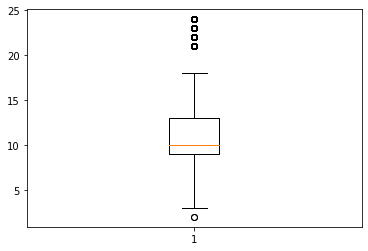

Injection_Time


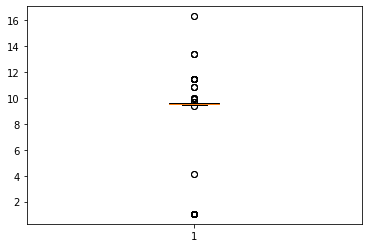

Filling_Time


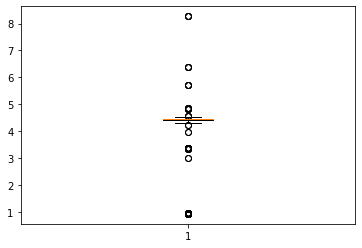

Plasticizing_Time


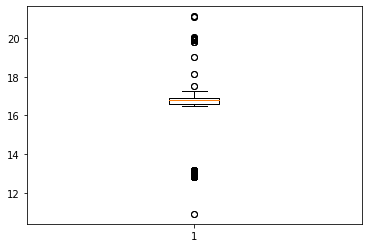

Cycle_Time


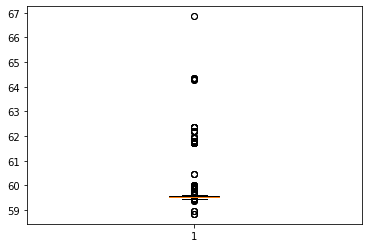

Clamp_Close_Time


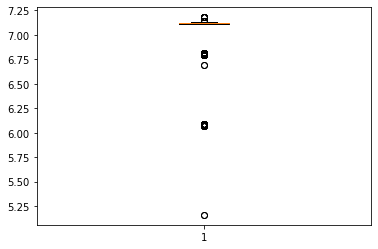

Cushion_Position


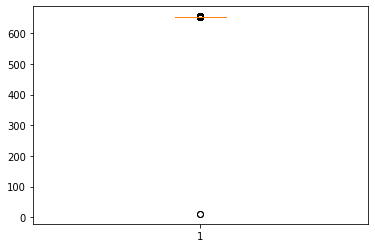

Switch_Over_Position


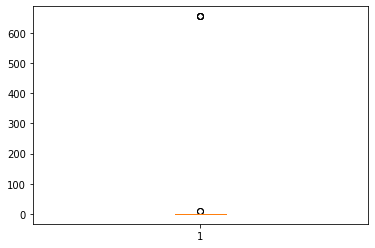

Plasticizing_Position


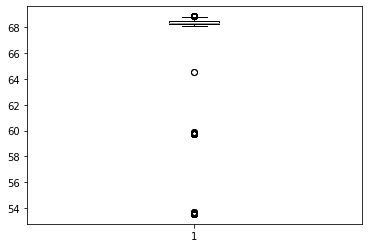

Clamp_Open_Position


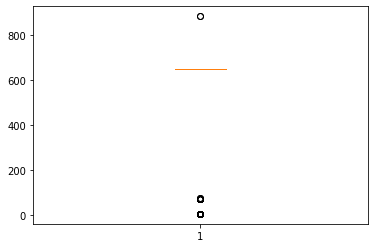

Max_Injection_Speed


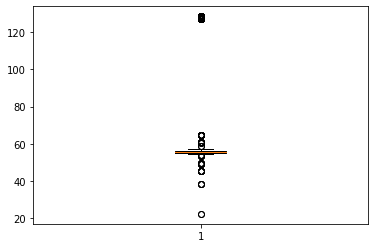

Max_Screw_RPM


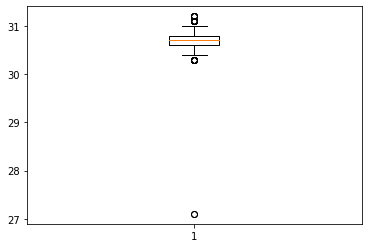

Average_Screw_RPM


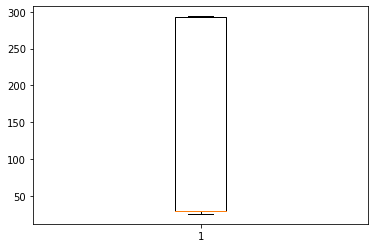

Max_Injection_Pressure


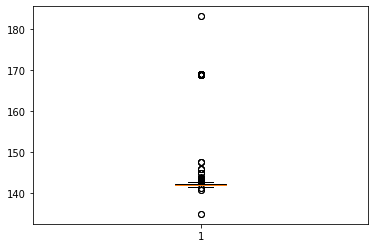

Max_Switch_Over_Pressure


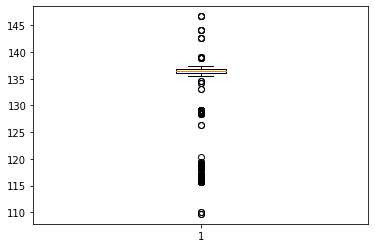

Max_Back_Pressure


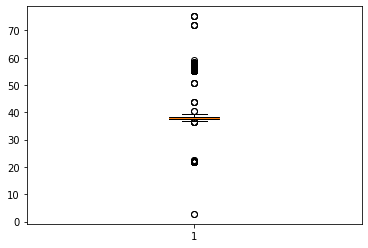

Average_Back_Pressure


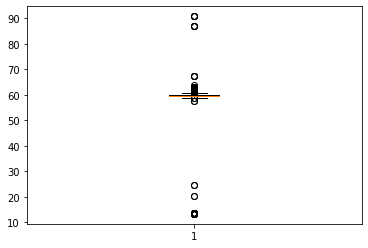

Barrel_Temperature_1


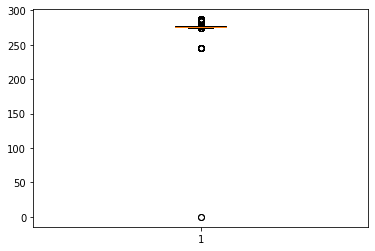

Barrel_Temperature_2


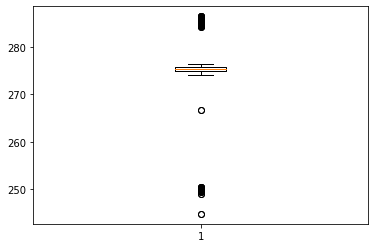

Barrel_Temperature_3


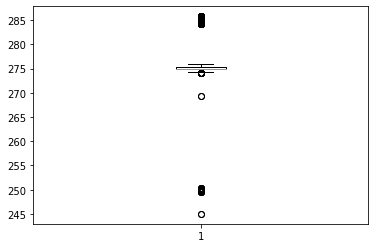

Barrel_Temperature_4


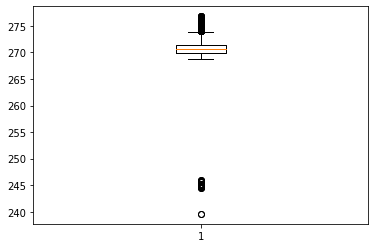

Barrel_Temperature_5


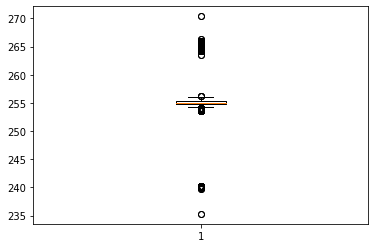

Barrel_Temperature_6


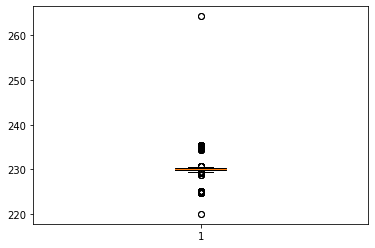

Hopper_Temperature


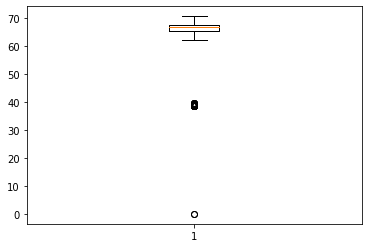

Mold_Temperature_3


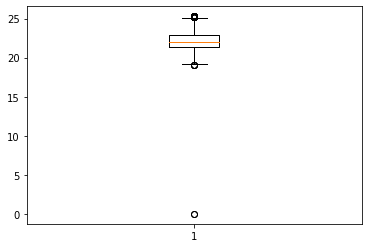

Mold_Temperature_4


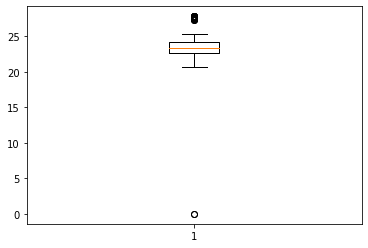

In [57]:
for i in df_prep_labeled.describe().columns:
    print(i)
    plt.show(plt.boxplot(df_raw_labeled[i]))


In [58]:
df_prep_unlabeled['TimeStamp'].value_counts()

2020-05-07 12:56:25    6
2020-05-11 19:07:58    6
2020-05-14 05:49:18    6
2020-05-11 11:54:15    6
2020-08-25 18:19:45    5
                      ..
2020-01-28 21:47:31    1
2020-06-23 05:29:29    1
2020-10-06 10:45:11    1
2020-03-26 23:03:17    1
2020-09-25 09:11:41    1
Name: TimeStamp, Length: 591508, dtype: int64

In [59]:
df_prep_unlabeled[df_prep_unlabeled['TimeStamp'] == '2020-05-14 05:49:18']

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
283659,5f9141216e37704af87c7e03,2020-05-14 05:49:18,2020-05-13 오전 12:00:00,11,86131S8000,LX2 W/S SIDE MLD'G LH,S12,650톤-우진,24,10.42,2.30,21.20,68.28,6.01,655.07,0.0,63.04,36.63,79.2,30.4,294.3,174.4,102.1,16.7,11.9,245.0,250.2,250.1,245.2,240.2,225.0,0.0,35.0,19.0,23.3
283660,5f9141216e37704af87c7e04,2020-05-14 05:49:18,2020-05-13 오전 12:00:00,12,86141S8000,LX2 W/S SIDE MLD'G RH,S12,650톤-우진,19,10.42,2.30,21.20,68.28,6.01,655.07,0.0,63.04,36.63,79.2,30.4,294.3,174.4,102.1,16.7,11.9,245.0,250.2,250.1,245.2,240.2,225.0,0.0,35.0,19.0,23.3
283661,5f9141216e37704af87c7e05,2020-05-14 05:49:18,2020-05-14 오전 12:00:00,12,YP5740B000,FOR YP SIDE STEP TRIM LH(사출),S10,3300TON-우진,8,21.07,12.56,21.51,93.38,10.23,7.90,8.0,219.90,1300.20,69.4,56.8,54.5,76.4,76.2,7.4,50.0,234.5,220.5,230.7,230.2,222.0,211.2,38.0,64.5,0.0,0.0
283662,5f9141216e37704af87c7e06,2020-05-14 05:49:18,2020-05-14 오전 12:00:00,13,YP5750B000,FOR YP SIDE STEP TRIM RH(사출),S10,3300TON-우진,8,21.07,12.56,21.51,93.38,10.23,7.90,8.0,219.90,1300.20,69.4,56.8,54.5,76.4,76.2,7.4,50.0,234.5,220.5,230.7,230.2,222.0,211.2,38.0,64.5,0.0,0.0
283663,5f9141216e37704af87c7e07,2020-05-14 05:49:18,2020-05-14 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,4,16.40,3.10,10.64,67.20,6.64,11.90,10.0,59.90,883.20,24.4,26.9,25.6,138.9,138.5,2.6,22.8,0.0,265.6,270.2,270.1,269.9,260.2,37.4,0.0,0.0,0.0
283664,5f9141216e37704af87c7e08,2020-05-14 05:49:18,2020-05-14 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,4,16.40,3.10,10.64,67.20,6.64,11.90,10.0,59.90,883.20,24.4,26.9,25.6,138.9,138.5,2.6,22.8,0.0,265.6,270.2,270.1,269.9,260.2,37.4,0.0,0.0,0.0


In [60]:
df_prep_unlabeled['EQUIP_NAME'].value_counts()

1800TON-우진       278425
650톤-우진          105338
650톤-우진2호기        82970
550TON-도시바        76815
240TON-우진         71076
850TON-미쓰비시       50794
3300TON-우진        50266
2000TON-동신        25689
850TON-LS 1호기     21415
수직사출기             20616
450TON-LS          6352
850TON-LS 2호기      4956
650TON-LS           505
Name: EQUIP_NAME, dtype: int64

In [61]:
df_tmp = df_prep_unlabeled[df_prep_unlabeled['EQUIP_NAME'] == '1800TON-우진']

In [62]:
df_tmp['TimeStamp'].value_counts()

2020-01-09 14:17:38    3
2020-08-18 17:06:41    3
2020-09-07 11:56:25    3
2020-07-17 06:38:58    3
2020-04-22 03:41:05    3
                      ..
2020-04-03 03:17:37    1
2020-07-29 05:54:57    1
2020-03-26 10:05:52    1
2020-01-15 01:33:09    1
2020-01-28 14:37:43    1
Name: TimeStamp, Length: 160141, dtype: int64

In [63]:
df_tmp[df_tmp['TimeStamp'] == '2020-09-07 10:23:53']

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
621399,5f9155616e37704af881a6a5,2020-09-07 10:23:53,2020-09-07 오전 12:00:00,10,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,4,5.00,5.00,2.7,35.50,3.20,17.2,17.3,38.5,492.2,37.0,0.0,0.0,80.1,70.0,3.7,0.0,0.0,264.8,265.0,264.8,255.0,240.1,29.3,64.0,0.0,0.0
621400,5f9155616e37704af881a6a6,2020-09-07 10:23:53,2020-09-07 오전 12:00:00,9,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,3,16.27,2.96,10.8,66.81,7.11,11.4,10.0,59.9,883.4,23.0,27.1,25.5,128.8,127.9,2.6,21.6,0.0,265.1,269.8,270.1,269.3,264.6,39.8,0.0,0.0,0.0
621401,5f9155616e37704af881a6a7,2020-09-07 10:23:53,2020-09-07 오전 12:00:00,10,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,4,16.27,2.96,10.8,66.81,7.11,11.4,10.0,59.9,883.4,23.0,27.1,25.5,128.8,127.9,2.6,21.6,0.0,265.1,269.8,270.1,269.3,264.6,39.8,0.0,0.0,0.0


In [64]:
df_tmp.loc[621399]

_id                          5f9155616e37704af881a6a5
TimeStamp                         2020-09-07 10:23:53
PART_FACT_PLAN_DATE            2020-09-07 오전 12:00:00
PART_FACT_SERIAL                                   10
PART_NO                                    87285Q5000
PART_NAME                   SP2 CVR ROOF RACK CTR, RH
EQUIP_CD                                          S01
EQUIP_NAME                                 1800TON-우진
ERR_FACT_QTY                                        4
Injection_Time                                      5
Filling_Time                                        5
Plasticizing_Time                                 2.7
Cycle_Time                                       35.5
Clamp_Close_Time                                  3.2
Cushion_Position                                 17.2
Switch_Over_Position                             17.3
Plasticizing_Position                            38.5
Clamp_Open_Position                             492.2
Max_Injection_Speed         

In [65]:
df_tmp.loc[621401]

_id                          5f9155616e37704af881a6a7
TimeStamp                         2020-09-07 10:23:53
PART_FACT_PLAN_DATE            2020-09-07 오전 12:00:00
PART_FACT_SERIAL                                   10
PART_NO                                    87285Q5000
PART_NAME                   SP2 CVR ROOF RACK CTR, RH
EQUIP_CD                                          S01
EQUIP_NAME                                 1800TON-우진
ERR_FACT_QTY                                        4
Injection_Time                                  16.27
Filling_Time                                     2.96
Plasticizing_Time                                10.8
Cycle_Time                                      66.81
Clamp_Close_Time                                 7.11
Cushion_Position                                 11.4
Switch_Over_Position                               10
Plasticizing_Position                            59.9
Clamp_Open_Position                             883.4
Max_Injection_Speed         

In [66]:
df_prep_unlabeled.describe().columns

Index(['PART_FACT_SERIAL', 'ERR_FACT_QTY', 'Injection_Time', 'Filling_Time',
       'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_3', 'Mold_Temperature_4'],
      dtype='object')

In [67]:
df_tmp = df_prep_unlabeled[['Max_Screw_RPM', 'ERR_FACT_QTY']]

In [68]:
df_tmp['Max_Screw_RPM'].value_counts()

0.0     266487
26.9     58177
27.0     52000
27.1     48781
30.3     35431
         ...  
31.9         1
32.4         1
20.8         1
41.5         1
44.9         1
Name: Max_Screw_RPM, Length: 192, dtype: int64

In [69]:
df_tmp2 = df_prep_unlabeled[['TimeStamp', 'ERR_FACT_QTY', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
                             'Cycle_Time', 'Clamp_Close_Time','Max_Injection_Speed', 'Max_Screw_RPM', 
                             'Average_Screw_RPM', 'Max_Injection_Pressure','Max_Switch_Over_Pressure', 'Max_Back_Pressure',
                             'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
                             'Barrel_Temperature_4', 'Barrel_Temperature_5','Barrel_Temperature_6', 'Barrel_Temperature_7', 
                             'Hopper_Temperature','Mold_Temperature_3', 'Mold_Temperature_4']]

In [70]:
df_tmp2 = df_tmp2.set_index(['TimeStamp'])

In [71]:
df_tmp2

,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:59:22,11,3.18,2.66,13.14,0.00,12.30,35.6,0.0,0.0,103.2,102.8,0.0,0.0,0.0,261.8,270.4,271.1,273.5,260.3,18.8,0.0,0.0,0.0
2020-01-02 01:01:01,11,16.29,2.78,13.72,0.00,12.50,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0.0,0.0
2020-01-02 01:01:01,11,16.29,2.78,13.72,0.00,12.50,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0.0,0.0
2020-01-02 01:02:24,11,16.28,2.78,12.74,81.38,12.77,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,19.4,0.0,0.0,0.0
2020-01-02 01:02:24,11,16.28,2.78,12.74,81.38,12.77,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,19.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-23 05:30:20,0,12.09,4.58,14.40,83.00,11.38,41.6,64.5,61.2,86.2,84.2,7.3,49.3,0.0,218.9,231.6,231.2,224.6,211.3,37.1,63.0,0.0,0.0
2020-10-23 05:30:24,0,11.47,3.36,20.01,64.28,6.04,64.6,30.4,293.9,169.0,129.0,22.3,13.7,245.5,250.1,250.1,245.2,240.0,225.2,0.0,39.0,20.2,23.6
2020-10-23 05:31:13,2,16.34,3.03,10.67,66.82,5.85,22.4,27.2,25.8,139.9,139.5,3.2,26.9,0.0,264.1,270.4,270.1,270.0,265.6,34.9,0.0,0.0,0.0


In [72]:
values = df_tmp2.values
groups = [0, 1, 2, 3]

In [74]:
# plt.figure()

# for group in groups:
#     plt.subplot(len(groups), 1, i)
#     plt.plot(values[:, group])
#     plt.title(dataset.columns[group], y=0.5, loc='right')
#     i += 1
# pyplot.show()

In [100]:
df_raw_unlabeled['PART_FACT_SERIAL'].value_counts()

1     113769
10     91893
2      88804
4      82082
7      74166
9      66599
5      64387
6      28489
3      27492
12     24510
13     17774
17     15743
11     13859
18     12537
20     12346
8      10052
21     10040
15      6896
24      6793
23      5924
16      4442
14      3977
26      2688
25      2587
27      1288
19      1208
22      1186
53       698
54       697
30       474
29       459
35       307
32       232
31       161
34       146
37       126
38       126
33       102
42        85
43        85
36        78
28         8
Name: PART_FACT_SERIAL, dtype: int64

In [156]:
df_raw_unlabeled[['PART_NO', 'ERR_FACT_QTY']].value_counts()

PART_NO     ERR_FACT_QTY
87293Q5000  0               58614
87285Q5000  0               24616
87275Q5000  0               23163
            3               15365
            4               12600
                            ...  
86141T6000  37                  1
86131T6000  89                  1
86131S8000  11                  1
86131T1000  31                  1
86141T1000  132                 1
Length: 645, dtype: int64

In [108]:
df_raw_unlabeled[df_raw_unlabeled['PART_FACT_SERIAL'] == 14]

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
21021,5f9136e76e37704af8787b0f,2020-01-15 23:44:14,2020-01-16 오전 12:00:00,14,YP5750B000,FOR YP SIDE STEP TRIM RH(사출),S10,3300TON-우진,0,20.10,11.59,18.95,100.15,11.62,6.70,8.0,219.90,1300.30,71.2,57.4,55.9,99.3,85.3,7.6,51.6,227.4,219.7,231.8,235.3,227.3,216.5,18.5,54.9,0,0,0.0,0.0,0,0,0,0,0,0,0,0
21023,5f9136e76e37704af8787b11,2020-01-15 23:45:42,2020-01-16 오전 12:00:00,14,YP5750B000,FOR YP SIDE STEP TRIM RH(사출),S10,3300TON-우진,0,19.33,10.82,18.84,88.21,10.54,7.00,8.0,219.90,1300.10,71.0,58.0,55.3,77.2,74.4,8.3,50.0,226.7,218.8,233.5,235.8,228.3,217.2,18.7,54.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
21025,5f9136e76e37704af8787b13,2020-01-15 23:47:12,2020-01-16 오전 12:00:00,14,YP5750B000,FOR YP SIDE STEP TRIM RH(사출),S10,3300TON-우진,0,19.36,10.85,18.33,90.48,10.42,6.60,8.0,219.90,1300.00,70.7,57.8,55.3,77.8,73.2,9.0,50.1,227.8,220.8,234.8,236.2,228.3,217.2,18.8,54.2,0,0,0.0,0.0,0,0,0,0,0,0,0,0
21027,5f9136e76e37704af8787b15,2020-01-15 23:48:40,2020-01-16 오전 12:00:00,14,YP5750B000,FOR YP SIDE STEP TRIM RH(사출),S10,3300TON-우진,0,19.38,10.87,18.11,88.10,10.38,7.40,8.0,219.90,1300.10,70.7,57.7,55.2,77.4,74.3,8.6,50.1,227.7,220.0,235.3,235.5,228.3,216.4,18.4,54.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
21029,5f9136e76e37704af8787b17,2020-01-15 23:50:10,2020-01-16 오전 12:00:00,14,YP5750B000,FOR YP SIDE STEP TRIM RH(사출),S10,3300TON-우진,0,19.43,10.92,18.27,88.80,10.36,7.80,8.0,219.90,1300.10,71.1,57.7,55.2,78.3,76.2,9.0,50.0,227.6,219.4,235.5,234.8,227.6,216.1,18.5,54.6,0,0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777204,5f915c1e6e37704af88407de,2020-10-20 06:16:15,2020-10-20 오전 12:00:00,14,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,9.53,4.41,17.26,59.48,7.12,653.41,0.0,68.47,647.99,56.5,30.8,292.7,141.8,136.5,38.2,59.5,276.1,276.1,274.9,269.6,255.2,229.6,0.0,70.5,0,0,23.5,24.6,0,0,0,0,0,0,0,0
777207,5f915c1e6e37704af88407e1,2020-10-20 06:17:15,2020-10-20 오전 12:00:00,14,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,9.53,4.42,17.51,59.48,7.12,653.41,0.0,68.44,647.99,56.5,31.0,292.7,141.8,136.4,38.3,59.5,276.3,275.5,275.4,270.0,255.3,230.1,0.0,69.5,0,0,23.5,24.6,0,0,0,0,0,0,0,0
777212,5f915c1e6e37704af88407e6,2020-10-20 06:18:16,2020-10-20 오전 12:00:00,14,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,9.50,4.39,18.16,59.46,7.12,653.41,0.0,68.40,647.99,57.2,30.9,293.0,141.6,135.8,38.2,59.2,276.3,275.3,275.5,271.2,255.2,230.2,0.0,68.8,0,0,23.5,24.6,0,0,0,0,0,0,0,0
777216,5f915c1e6e37704af88407ea,2020-10-20 06:19:14,2020-10-20 오전 12:00:00,14,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,9.43,4.32,19.02,59.44,7.12,653.43,0.0,68.35,647.99,58.8,31.0,293.4,141.2,134.6,38.0,58.6,275.8,275.7,274.7,271.8,255.1,230.0,0.0,69.5,0,0,23.5,24.5,0,0,0,0,0,0,0,0


In [112]:
df_raw_unlabeled[['PART_FACT_SERIAL', 'PART_NO', 'PART_NAME']].value_counts()

PART_FACT_SERIAL  PART_NO     PART_NAME                     
1                 87275Q5000  SP2 CVR ROOF RACK CTR, LH         88946
2                 87285Q5000  SP2 CVR ROOF RACK CTR, RH         81094
5                 87293Q5000  SP2 CAP-ROOF RACK(사출)             33821
4                 87287Q5000  SP2 PAD-ROOF RACK, RH             20896
10                86131S8000  LX2 W/S SIDE MLD'G LH             15412
                                                                ...  
14                86141S8000  LX2 W/S SIDE MLD'G RH                 1
5                 86142J7700  CD S/B MOLD'G W/S SIDE RH             1
8                 87136T1000  RG3 MLD'G-RR GLS LWR CVR              1
11                87281K0000  SK3 STANCHION-ROOF RACK FR, RH        1
1                 86131AA000  CN7 W/S SIDE MLD'G LH                 1
Length: 523, dtype: int64

In [123]:
df_raw_unlabeled['PART_FACT_SERIAL'].value_counts()

1     113769
10     91893
2      88804
4      82082
7      74166
9      66599
5      64387
6      28489
3      27492
12     24510
13     17774
17     15743
11     13859
18     12537
20     12346
8      10052
21     10040
15      6896
24      6793
23      5924
16      4442
14      3977
26      2688
25      2587
27      1288
19      1208
22      1186
53       698
54       697
30       474
29       459
35       307
32       232
31       161
34       146
37       126
38       126
33       102
42        85
43        85
36        78
28         8
Name: PART_FACT_SERIAL, dtype: int64

In [126]:
df_raw_unlabeled[df_raw_unlabeled['PART_FACT_SERIAL'] == 1][['PART_FACT_SERIAL', 'PART_NO', 'PART_NAME']]

,PART_FACT_SERIAL,PART_NO,PART_NAME
1,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
3,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
5,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
7,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
9,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
...,...,...,...
795290,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
795296,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
795301,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"
795306,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH"


In [128]:
df_raw_unlabeled[df_raw_unlabeled['PART_FACT_SERIAL'] == 1]['PART_NO'].value_counts()

87275Q5000    88946
87272K0000     8004
87293Q5000     7102
ON-SS1130      2226
87277Q5000     1612
DM3120L000     1221
87272R1400     1130
TM1220B003     1049
9163240004      706
TM3050L000      480
DM3050L000      422
TM1200B003      293
YP5740B000      169
ON-SS1110       146
86131T1000      115
TL3050L000       87
ON-SS1140        50
YP3320L000       10
86131AA000        1
Name: PART_NO, dtype: int64

In [130]:
df_raw_unlabeled['PART_NO'].value_counts()

87275Q5000    118071
87285Q5000    114977
87293Q5000     68342
86131S8000     40647
86141AA000     27885
               ...  
9163240030        18
YP3320L000        10
87264R1400         7
87281K0000         1
87274K0000         1
Name: PART_NO, Length: 81, dtype: int64

In [170]:
df_tmp = df_prep_unlabeled[df_prep_unlabeled['PART_NO'] == '87275Q5000']

In [171]:
df_tmp.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NO', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'ERR_FACT_QTY',
       'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_3', 'Mold_Temperature_4'],
      dtype='object')

In [172]:
df_tmp[['_id', 'TimeStamp', 'PART_NO', 'ERR_FACT_QTY', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time', 
        'Clamp_Close_Time', 'Max_Injection_Speed','Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure','Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5','Barrel_Temperature_6', 'Barrel_Temperature_7', 
        'Hopper_Temperature','Mold_Temperature_3',
       'Mold_Temperature_4']].head()

,_id,TimeStamp,PART_NO,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
1,5f9136166e37704af878240f,2020-01-02 01:01:01,87275Q5000,11,16.29,2.78,13.72,0.00,12.50,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0.0,0.0
3,5f9136166e37704af8782411,2020-01-02 01:02:24,87275Q5000,11,16.28,2.78,12.74,81.38,12.77,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,19.4,0.0,0.0,0.0
5,5f9136166e37704af8782413,2020-01-02 01:03:45,87275Q5000,11,16.29,2.78,12.13,81.44,12.77,24.9,28.0,26.2,127.6,127.2,5.6,50.0,0.0,261.8,270.1,270.3,273.8,262.1,18.9,0.0,0.0,0.0
7,5f9136166e37704af8782415,2020-01-02 01:05:06,87275Q5000,11,16.30,2.79,11.84,81.10,12.51,24.4,27.9,25.9,128.6,127.9,5.6,50.4,0.0,263.1,270.0,270.7,272.5,261.1,18.4,0.0,0.0,0.0
9,5f9136166e37704af8782417,2020-01-02 01:06:25,87275Q5000,11,16.30,2.79,11.73,80.93,12.35,25.1,27.9,25.9,128.7,128.0,5.5,50.4,0.0,260.8,270.1,270.8,271.1,260.0,19.2,0.0,0.0,0.0


In [173]:
df_tmp['ERR_FACT_QTY'].describe()

count    118068.000000
mean          7.455805
std          13.554798
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         103.000000
Name: ERR_FACT_QTY, dtype: float64

In [174]:
df_tmp = df_tmp.set_index('TimeStamp')

In [175]:
df_tmp['ERR_FACT_QTY'].value_counts()

0      23163
3      15365
4      12600
2       9318
5       8935
1       7314
12      5483
11      4848
10      4428
7       4352
8       4179
9       3070
15      1893
14      1858
6       1563
27      1284
72      1270
21      1209
103     1186
44      1158
20      1037
17       985
23       821
18       749
Name: ERR_FACT_QTY, dtype: int64

In [176]:
df_tmp[df_tmp['ERR_FACT_QTY'] > 10]

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02 01:01:01,5f9136166e37704af878240f,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.29,2.78,13.72,0.00,12.50,9.0,10.0,59.9,883.3,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0.0,0.0
2020-01-02 01:02:24,5f9136166e37704af8782411,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.28,2.78,12.74,81.38,12.77,8.7,10.0,59.9,883.4,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,19.4,0.0,0.0,0.0
2020-01-02 01:03:45,5f9136166e37704af8782413,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.29,2.78,12.13,81.44,12.77,9.3,10.0,59.9,883.3,24.9,28.0,26.2,127.6,127.2,5.6,50.0,0.0,261.8,270.1,270.3,273.8,262.1,18.9,0.0,0.0,0.0
2020-01-02 01:05:06,5f9136166e37704af8782415,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.30,2.79,11.84,81.10,12.51,10.0,10.0,59.9,883.5,24.4,27.9,25.9,128.6,127.9,5.6,50.4,0.0,263.1,270.0,270.7,272.5,261.1,18.4,0.0,0.0,0.0
2020-01-02 01:06:25,5f9136166e37704af8782417,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.30,2.79,11.73,80.93,12.35,10.2,10.0,59.9,883.4,25.1,27.9,25.9,128.7,128.0,5.5,50.4,0.0,260.8,270.1,270.8,271.1,260.0,19.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-09 21:19:25,5f9159a06e37704af8830e2a,2020-10-09 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,103,16.13,2.82,11.03,66.07,5.93,10.7,10.0,59.9,883.1,26.5,27.5,25.7,136.1,135.4,2.7,23.3,0.0,263.3,269.4,270.0,269.9,265.1,37.0,0.0,0.0,0.0
2020-10-09 21:20:32,5f9159a06e37704af8830e2f,2020-10-09 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,103,16.11,2.80,12.02,66.10,5.94,9.7,10.0,59.9,883.0,26.6,27.6,25.7,133.5,132.6,2.7,23.5,0.0,265.6,270.1,269.9,270.0,266.1,38.1,0.0,0.0,0.0
2020-10-09 21:21:37,5f9159a06e37704af8830e33,2020-10-09 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,103,16.12,2.81,13.84,66.12,5.94,10.0,10.0,59.9,883.0,27.5,27.7,25.5,134.1,133.3,2.8,22.7,0.0,267.4,269.9,270.1,270.0,266.7,39.0,0.0,0.0,0.0


## 87275Q5000 제품은 1800TON-우진에서만 생산되고 있음

생산되는 불량제품의 수는 증가하고 있음 <br>
생산시 각 파트별 온도가 제품불량에 어떠한 영향을 주고 있는가? <br>
파트별 온도에 따라 불량이 생산되는지 예측가능한 모델을 만들 수 있는가? <br>

<AxesSubplot:xlabel='TimeStamp'>

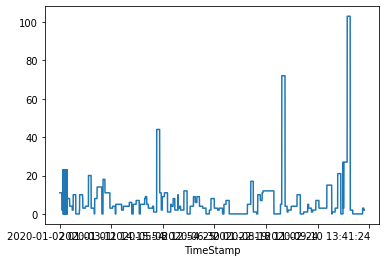

In [177]:
df_tmp['ERR_FACT_QTY'].plot()

In [ ]:
df_prep_unlabeled[]

In [ ]:
df_raw_unlabeled[df_raw_unlabeled['PART_FACT_SERIAL'] == 14]['ERR_FACT_QTY'].sum()

In [85]:
# df_prep_labeled['EQUIP_NAME'].value_counts()
df_raw_labeled['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

In [89]:
df_raw_unlabeled[['ERR_FACT_QTY', 'EQUIP_NAME']].value_counts()

ERR_FACT_QTY  EQUIP_NAME
0             240TON-우진     61320
              1800TON-우진    48649
3             1800TON-우진    40139
4             1800TON-우진    26140
2             1800TON-우진    21932
                            ...  
32            650톤-우진           1
23            650톤-우진2호기        1
132           650톤-우진           1
              650톤-우진2호기        1
89            650톤-우진2호기        1
Length: 324, dtype: int64

In [91]:
df_tmp = df_raw_unlabeled[['ERR_FACT_QTY', 'EQUIP_NAME']]

In [92]:
df_tmp['EQUIP_NAME'].value_counts()

1800TON-우진       278431
650톤-우진          105360
650톤-우진2호기        82970
550TON-도시바        76818
240TON-우진         71076
850TON-미쓰비시       50794
3300TON-우진        50266
2000TON-동신        25692
850TON-LS 1호기     21415
수직사출기             20616
450TON-LS          6383
850TON-LS 2호기      4987
650TON-LS           507
Name: EQUIP_NAME, dtype: int64

In [98]:
df_tmp.value_counts().tail(30)

ERR_FACT_QTY  EQUIP_NAME   
118           650톤-우진2호기       8
321           650톤-우진2호기       8
15            550TON-도시바       8
119           550TON-도시바       8
47            650톤-우진          8
17            650톤-우진          7
90            650톤-우진2호기       7
11            650톤-우진2호기       7
12            850TON-LS 1호기    6
46            650톤-우진2호기       6
30            650톤-우진2호기       6
258           650톤-우진2호기       5
71            650톤-우진          5
120           650톤-우진2호기       4
108           650톤-우진          4
46            550TON-도시바       3
42            550TON-도시바       2
141           650톤-우진          1
59            650톤-우진          1
63            550TON-도시바       1
188           650톤-우진2호기       1
106           650톤-우진          1
72            2000TON-동신       1
155           650톤-우진          1
58            550TON-도시바       1
32            650톤-우진          1
23            650톤-우진2호기       1
132           650톤-우진          1
              650톤-우진2호기       1
89            6

In [ ]:
# unlabelled 데이터 중에서 650톤-우진, 650톤-우진2호기의 불량률 >> 1800TON-우진 비교해 보기

In [456]:
df_prep_unlabeled = df_prep_unlabeled.drop_duplicates(subset='_id')

In [458]:
df_prep_unlabeled.head()

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
37338,5f9137876e37704af878badc,2020-01-29 03:12:08,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.4,17.5,40.5,522.6,26.2,0.0,0.0,76.0,69.7,5.3,0.0,0.0,249.8,259.9,260.0,244.8,225.0,30.8,54.9,0.0,0.0
37339,5f9137876e37704af878badd,2020-01-29 03:12:46,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.5,17.6,40.5,522.7,26.0,0.0,0.0,76.0,70.1,5.3,0.0,0.0,250.1,259.9,260.0,244.7,225.1,30.9,54.9,0.0,0.0
37342,5f9137876e37704af878bae0,2020-01-29 03:13:25,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.4,17.5,40.5,522.7,25.7,0.0,0.0,76.0,70.1,5.3,0.0,0.0,249.9,259.9,260.0,244.7,225.2,30.9,54.9,0.0,0.0
37343,5f9137876e37704af878bae1,2020-01-29 03:14:05,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.2,39.1,3.4,17.4,17.5,40.5,522.6,26.1,0.0,0.0,75.9,69.8,5.3,0.0,0.0,249.8,260.0,260.1,244.8,225.0,30.9,55.0,0.0,0.0
37344,5f9137876e37704af878bae2,2020-01-29 03:14:44,2020-01-29 오전 12:00:00,7,12,6.0,6.0,3.1,39.1,3.4,17.5,17.5,40.5,522.6,25.9,0.0,0.0,76.0,70.2,5.3,0.0,0.0,249.8,260.0,260.1,244.9,224.9,30.9,55.0,0.0,0.0


In [459]:
df_prep_unlabeled.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'ERR_FACT_QTY', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Switch_Over_Position', 'Plasticizing_Position', 'Clamp_Open_Position',
       'Max_Injection_Speed', 'Max_Screw_RPM', 'Average_Screw_RPM',
       'Max_Injection_Pressure', 'Max_Switch_Over_Pressure',
       'Max_Back_Pressure', 'Average_Back_Pressure', 'Barrel_Temperature_1',
       'Barrel_Temperature_2', 'Barrel_Temperature_3', 'Barrel_Temperature_4',
       'Barrel_Temperature_5', 'Barrel_Temperature_6', 'Barrel_Temperature_7',
       'Hopper_Temperature', 'Mold_Temperature_3', 'Mold_Temperature_4'],
      dtype='object')

In [461]:
df_prep_unlabeled.describe().to_csv('test3.csv')

In [462]:
df_prep_unlabeled.mode().to_csv('test4.csv')

In [465]:
df_prep_unlabeled.to_csv('prep_unlabelled.csv')

In [570]:
from sklearn.preprocessing import MinMaxScaler

In [571]:
df_prep_unlabeled = pd.read_csv(r'prep_unlabelled.csv', index_col=0)

In [581]:
df_columns = df_prep_unlabeled.drop(columns =['TimeStamp', 'ERR_FACT_QTY','_id', 
                                                            'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL'])

In [572]:
df_prep_unlabeled_minmax = df_prep_unlabeled.drop(columns =['TimeStamp', 'ERR_FACT_QTY','_id', 
                                                            'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL'])

In [573]:
df_prep_unlabeled_minmax

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
37338,6.00,6.00,3.10,39.10,3.40,17.40,17.5,40.50,522.60,26.2,0.0,0.0,76.0,69.7,5.3,0.0,0.0,249.8,259.9,260.0,244.8,225.0,30.8,54.9,0.0,0.0
37339,6.00,6.00,3.10,39.10,3.40,17.50,17.6,40.50,522.70,26.0,0.0,0.0,76.0,70.1,5.3,0.0,0.0,250.1,259.9,260.0,244.7,225.1,30.9,54.9,0.0,0.0
37342,6.00,6.00,3.10,39.10,3.40,17.40,17.5,40.50,522.70,25.7,0.0,0.0,76.0,70.1,5.3,0.0,0.0,249.9,259.9,260.0,244.7,225.2,30.9,54.9,0.0,0.0
37343,6.00,6.00,3.20,39.10,3.40,17.40,17.5,40.50,522.60,26.1,0.0,0.0,75.9,69.8,5.3,0.0,0.0,249.8,260.0,260.1,244.8,225.0,30.9,55.0,0.0,0.0
37344,6.00,6.00,3.10,39.10,3.40,17.50,17.5,40.50,522.60,25.9,0.0,0.0,76.0,70.2,5.3,0.0,0.0,249.8,260.0,260.1,244.9,224.9,30.9,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640269,9.61,4.50,17.05,64.50,7.10,653.42,0.0,68.45,647.99,54.9,30.6,292.5,142.1,137.3,39.5,60.2,271.2,274.8,275.0,269.4,255.3,229.6,0.0,71.8,28.3,30.0
640525,9.60,4.48,17.04,64.50,7.10,653.43,0.0,68.43,647.99,55.1,30.9,292.5,142.0,137.1,39.3,60.1,271.4,275.0,274.7,270.3,254.7,230.0,0.0,72.1,28.4,30.1
640761,9.63,4.52,17.07,64.56,7.09,653.43,0.0,68.47,647.99,54.7,30.8,292.5,142.1,137.6,39.9,60.4,271.3,275.0,274.5,271.1,254.7,230.0,0.0,72.5,28.7,30.4
641379,9.59,4.48,17.04,64.50,7.11,653.43,0.0,68.44,647.99,55.3,30.7,292.5,141.9,136.9,39.5,60.2,271.3,275.7,275.0,271.3,254.5,230.1,0.0,72.2,29.8,32.1


In [605]:
from datetime import datetime

df_time = df_prep_unlabeled['TimeStamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [606]:
df_time

37338    2020-01-29 03:12:08
37339    2020-01-29 03:12:46
37342    2020-01-29 03:13:25
37343    2020-01-29 03:14:05
37344    2020-01-29 03:14:44
                 ...        
640269   2020-09-10 04:05:58
640525   2020-09-10 04:54:21
640761   2020-09-10 05:39:31
641379   2020-09-10 07:46:24
641430   2020-09-10 07:56:05
Name: TimeStamp, Length: 40647, dtype: datetime64[ns]

In [576]:
scaler = MinMaxScaler()

scaler = scaler.fit_transform(df_prep_unlabeled_minmax)

In [579]:
df_prep_unlabeled_minmax=pd.DataFrame(scaler)

In [580]:
df_prep_unlabeled_minmax.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
count,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000,40647.000000
mean,0.518324,0.579731,0.236654,0.505706,0.130917,0.400043,0.017756,0.314577,0.554130,0.305922,0.201903,0.307455,0.559989,0.494586,0.147676,0.062957,0.335873,0.393157,0.700249,0.802622,0.776475,0.842749,0.593022,0.519949,0.229219,0.207042
std,0.214078,0.200428,0.218290,0.155074,0.134157,0.472128,0.022826,0.206626,0.347874,0.184065,0.271414,0.391894,0.267784,0.162078,0.191439,0.126461,0.427050,0.066898,0.122075,0.142203,0.112363,0.110497,0.467658,0.298189,0.300848,0.275239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374688,0.317568,0.064986,0.386729,0.026882,0.027925,0.000000,0.155833,0.065085,0.172445,0.000000,0.000000,0.358040,0.377651,0.041981,0.000000,0.000000,0.310398,0.536965,0.603627,0.629766,0.704748,0.000000,0.124352,0.000000,0.000000
50%,0.457952,0.675676,0.067585,0.398942,0.035842,0.028688,0.027772,0.157522,0.741843,0.201642,0.000000,0.000000,0.359925,0.380098,0.057051,0.000000,0.000000,0.422018,0.727626,0.854922,0.811808,0.922849,0.939297,0.665803,0.000000,0.000000
75%,0.823480,0.675676,0.539641,0.691736,0.272401,0.999603,0.028535,0.536721,0.797569,0.553832,0.479430,0.786268,0.942839,0.637031,0.178687,0.072639,0.852573,0.423547,0.791180,0.918394,0.872079,0.925816,0.971246,0.735751,0.566138,0.483101
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [582]:
df_columns.columns

Index(['Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_3', 'Mold_Temperature_4'],
      dtype='object')

In [583]:
df_prep_unlabeled_minmax.columns = df_columns.columns

In [584]:
df_prep_unlabeled_minmax

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.071168,0.000000,0.000000,0.329146,0.376835,0.057051,0.000000,0.000000,0.308104,0.661479,0.790155,0.686347,0.703264,0.984026,0.544041,0.000000,0.000000
1,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026857,0.155833,0.798027,0.069343,0.000000,0.000000,0.329146,0.380098,0.057051,0.000000,0.000000,0.310398,0.661479,0.790155,0.685117,0.704748,0.987220,0.544041,0.000000,0.000000
2,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.798027,0.066606,0.000000,0.000000,0.329146,0.380098,0.057051,0.000000,0.000000,0.308869,0.661479,0.790155,0.685117,0.706231,0.987220,0.544041,0.000000,0.000000
3,0.457952,0.810811,0.075383,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.070255,0.000000,0.000000,0.328518,0.377651,0.057051,0.000000,0.000000,0.308104,0.662776,0.791451,0.686347,0.703264,0.987220,0.546632,0.000000,0.000000
4,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026704,0.155833,0.797875,0.068431,0.000000,0.000000,0.329146,0.380914,0.057051,0.000000,0.000000,0.308104,0.662776,0.791451,0.687577,0.701780,0.987220,0.546632,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40642,0.758535,0.608108,0.435404,0.656422,0.367384,0.997085,0.000000,0.627722,0.989313,0.333029,0.484177,0.781459,0.744347,0.928222,0.425188,0.364407,0.942976,0.499235,0.857328,0.911917,0.815498,0.771513,0.000000,0.981865,0.748677,0.596421
40643,0.757702,0.605405,0.435144,0.656422,0.367384,0.997101,0.000000,0.627385,0.989313,0.334854,0.488924,0.781459,0.743719,0.926591,0.423036,0.363801,0.943672,0.500765,0.853437,0.923575,0.808118,0.777448,0.000000,0.989637,0.751323,0.598410
40644,0.760200,0.610811,0.435924,0.657032,0.366487,0.997101,0.000000,0.628060,0.989313,0.331204,0.487342,0.781459,0.744347,0.930669,0.429494,0.365617,0.943324,0.500765,0.850843,0.933938,0.808118,0.777448,0.000000,1.000000,0.759259,0.604374
40645,0.756869,0.605405,0.435144,0.656422,0.368280,0.997101,0.000000,0.627554,0.989313,0.336679,0.485759,0.781459,0.743090,0.924959,0.425188,0.364407,0.943324,0.506116,0.857328,0.936528,0.805658,0.778932,0.000000,0.992228,0.788360,0.638171


In [608]:
df_tmp = pd.DataFrame(df_time)

In [ ]:
df_qty = df_prep_unlabeled['ERR_FACT_QTY']

In [610]:
df_tmp['ERR_FACT_QTY'] = df_qty

In [614]:
df_tmp = df_tmp.reset_index().drop(columns=['index'])

In [615]:
df_prep_unlabeled_minmax['TimeStamp'] = df_tmp['TimeStamp']

In [616]:
df_prep_unlabeled_minmax['ERR_FACT_QTY'] = df_tmp['ERR_FACT_QTY']

In [617]:
df_prep_unlabeled_minmax

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4,TimeStamp,ERR_FACT_QTY
0,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.071168,0.000000,0.000000,0.329146,0.376835,0.057051,0.000000,0.000000,0.308104,0.661479,0.790155,0.686347,0.703264,0.984026,0.544041,0.000000,0.000000,2020-01-29 03:12:08,12
1,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026857,0.155833,0.798027,0.069343,0.000000,0.000000,0.329146,0.380098,0.057051,0.000000,0.000000,0.310398,0.661479,0.790155,0.685117,0.704748,0.987220,0.544041,0.000000,0.000000,2020-01-29 03:12:46,12
2,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.798027,0.066606,0.000000,0.000000,0.329146,0.380098,0.057051,0.000000,0.000000,0.308869,0.661479,0.790155,0.685117,0.706231,0.987220,0.544041,0.000000,0.000000,2020-01-29 03:13:25,12
3,0.457952,0.810811,0.075383,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.070255,0.000000,0.000000,0.328518,0.377651,0.057051,0.000000,0.000000,0.308104,0.662776,0.791451,0.686347,0.703264,0.987220,0.546632,0.000000,0.000000,2020-01-29 03:14:05,12
4,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026704,0.155833,0.797875,0.068431,0.000000,0.000000,0.329146,0.380914,0.057051,0.000000,0.000000,0.308104,0.662776,0.791451,0.687577,0.701780,0.987220,0.546632,0.000000,0.000000,2020-01-29 03:14:44,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40642,0.758535,0.608108,0.435404,0.656422,0.367384,0.997085,0.000000,0.627722,0.989313,0.333029,0.484177,0.781459,0.744347,0.928222,0.425188,0.364407,0.942976,0.499235,0.857328,0.911917,0.815498,0.771513,0.000000,0.981865,0.748677,0.596421,2020-09-10 04:05:58,13
40643,0.757702,0.605405,0.435144,0.656422,0.367384,0.997101,0.000000,0.627385,0.989313,0.334854,0.488924,0.781459,0.743719,0.926591,0.423036,0.363801,0.943672,0.500765,0.853437,0.923575,0.808118,0.777448,0.000000,0.989637,0.751323,0.598410,2020-09-10 04:54:21,13
40644,0.760200,0.610811,0.435924,0.657032,0.366487,0.997101,0.000000,0.628060,0.989313,0.331204,0.487342,0.781459,0.744347,0.930669,0.429494,0.365617,0.943324,0.500765,0.850843,0.933938,0.808118,0.777448,0.000000,1.000000,0.759259,0.604374,2020-09-10 05:39:31,13
40645,0.756869,0.605405,0.435144,0.656422,0.368280,0.997101,0.000000,0.627554,0.989313,0.336679,0.485759,0.781459,0.743090,0.924959,0.425188,0.364407,0.943324,0.506116,0.857328,0.936528,0.805658,0.778932,0.000000,0.992228,0.788360,0.638171,2020-09-10 07:46:24,13


In [618]:
df_prep_unlabeled_minmax.to_csv('prep_unlabelled_ERR_nominmax_.csv')

In [641]:
df_prep_unlabeled_minmax = pd.read_csv('prep_unlabelled_minmax.csv', index_col=0)

In [642]:
df_prep_unlabeled_minmax

,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4,TimeStamp
0,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.071168,0.000000,0.000000,0.329146,0.376835,0.057051,0.000000,0.000000,0.308104,0.661479,0.790155,0.686347,0.703264,0.984026,0.544041,0.000000,0.000000,2020-01-29 3:12
1,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026857,0.155833,0.798027,0.069343,0.000000,0.000000,0.329146,0.380098,0.057051,0.000000,0.000000,0.310398,0.661479,0.790155,0.685117,0.704748,0.987220,0.544041,0.000000,0.000000,2020-01-29 3:12
2,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.798027,0.066606,0.000000,0.000000,0.329146,0.380098,0.057051,0.000000,0.000000,0.308869,0.661479,0.790155,0.685117,0.706231,0.987220,0.544041,0.000000,0.000000,2020-01-29 3:13
3,0.083916,0.457952,0.810811,0.075383,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.070255,0.000000,0.000000,0.328518,0.377651,0.057051,0.000000,0.000000,0.308104,0.662776,0.791451,0.686347,0.703264,0.987220,0.546632,0.000000,0.000000,2020-01-29 3:14
4,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026704,0.155833,0.797875,0.068431,0.000000,0.000000,0.329146,0.380914,0.057051,0.000000,0.000000,0.308104,0.662776,0.791451,0.687577,0.701780,0.987220,0.546632,0.000000,0.000000,2020-01-29 3:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40642,0.090909,0.758535,0.608108,0.435404,0.656422,0.367384,0.997085,0.000000,0.627722,0.989313,0.333029,0.484177,0.781459,0.744347,0.928222,0.425188,0.364407,0.942976,0.499235,0.857328,0.911917,0.815498,0.771513,0.000000,0.981865,0.748677,0.596421,2020-09-10 4:05
40643,0.090909,0.757702,0.605405,0.435144,0.656422,0.367384,0.997101,0.000000,0.627385,0.989313,0.334854,0.488924,0.781459,0.743719,0.926591,0.423036,0.363801,0.943672,0.500765,0.853437,0.923575,0.808118,0.777448,0.000000,0.989637,0.751323,0.598410,2020-09-10 4:54
40644,0.090909,0.760200,0.610811,0.435924,0.657032,0.366487,0.997101,0.000000,0.628060,0.989313,0.331204,0.487342,0.781459,0.744347,0.930669,0.429494,0.365617,0.943324,0.500765,0.850843,0.933938,0.808118,0.777448,0.000000,1.000000,0.759259,0.604374,2020-09-10 5:39
40645,0.090909,0.756869,0.605405,0.435144,0.656422,0.368280,0.997101,0.000000,0.627554,0.989313,0.336679,0.485759,0.781459,0.743090,0.924959,0.425188,0.364407,0.943324,0.506116,0.857328,0.936528,0.805658,0.778932,0.000000,0.992228,0.788360,0.638171,2020-09-10 7:46


In [512]:
df_tmp2.to_csv('prep_unlabelled_onlyERR.csv')

In [644]:
df_prep_unlabeled_minmax.head()

,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4,TimeStamp
0,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.071168,0.0,0.0,0.329146,0.376835,0.057051,0.0,0.0,0.308104,0.661479,0.790155,0.686347,0.703264,0.984026,0.544041,0.0,0.0,2020-01-29 3:12
1,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026857,0.155833,0.798027,0.069343,0.0,0.0,0.329146,0.380098,0.057051,0.0,0.0,0.310398,0.661479,0.790155,0.685117,0.704748,0.987220,0.544041,0.0,0.0,2020-01-29 3:12
2,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026552,0.026704,0.155833,0.798027,0.066606,0.0,0.0,0.329146,0.380098,0.057051,0.0,0.0,0.308869,0.661479,0.790155,0.685117,0.706231,0.987220,0.544041,0.0,0.0,2020-01-29 3:13
3,0.083916,0.457952,0.810811,0.075383,0.397924,0.035842,0.026552,0.026704,0.155833,0.797875,0.070255,0.0,0.0,0.328518,0.377651,0.057051,0.0,0.0,0.308104,0.662776,0.791451,0.686347,0.703264,0.987220,0.546632,0.0,0.0,2020-01-29 3:14
4,0.083916,0.457952,0.810811,0.072784,0.397924,0.035842,0.026704,0.026704,0.155833,0.797875,0.068431,0.0,0.0,0.329146,0.380914,0.057051,0.0,0.0,0.308104,0.662776,0.791451,0.687577,0.701780,0.987220,0.546632,0.0,0.0,2020-01-29 3:14


In [645]:
train_data = df_prep_unlabeled_minmax.drop(columns=['ERR_FACT_QTY','TimeStamp'])
target_data = df_prep_unlabeled_minmax['ERR_FACT_QTY']

In [646]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.3, random_state=1, shuffle=True)

In [647]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [648]:
lr.score(X_train, y_train)

0.3993674307094669

In [649]:
y_predict = lr.predict(X_test)

In [650]:
lr.score(X_test, y_test)

0.41241890356314603

In [651]:
r2_score(y_test, y_predict)

0.41241890356314603

In [652]:
RMSE = mean_squared_error(y_test, y_predict, squared=False)

In [653]:
RMSE

0.17027226772779974

In [661]:
lr.coef_

array([-0.29922623, -1.00526239,  0.33195889, -0.8220144 , -0.79595974,
       -0.38688372, -0.28139522,  0.97419552,  0.45503979, -0.06190923,
        0.12247186,  0.69662845,  3.52750187, -2.04372664, -0.31630629,
       -0.18410704, -0.78263674, -2.10175251,  4.04817415,  1.73487537,
       -5.36720423,  1.30087642,  0.01282677,  1.18988958,  0.17042713,
        0.0408076 ])

In [662]:
lr.intercept_

-0.8038198486820832

In [679]:
y_train

26881    0.279720
11813    0.055944
5883     0.027972
37683    0.405594
9439     0.000000
           ...   
7813     0.000000
32511    0.244755
5192     0.027972
12172    0.055944
33003    0.559441
Name: ERR_FACT_QTY, Length: 28452, dtype: float64

In [663]:
num_estimators = [10, 100, 200]
learn_rates = [0.1, 0.5, 1]
max_depths = [2,3,4]
min_samples_leaf = [5,10,15]
min_samples_split = [2,5,10]

In [664]:
param_grid = {
    'n_estimators' : num_estimators,
    'learning_rate' : learn_rates,
    'max_depth' : max_depths,
    'min_samples_leaf' : min_samples_leaf,
    'min_samples_split' : min_samples_split
}

In [665]:
grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'), param_grid=param_grid, cv=3, return_train_score=True)

In [666]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(loss='huber'),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 200]},
             return_train_score=True)

In [668]:
grid_search.best_params_

'''
{'learning_rate': 0.5,
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 200}
'''

{'learning_rate': 0.5,
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [688]:
gb = GradientBoostingRegressor(learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200)

In [689]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=4, min_samples_leaf=5,
                          n_estimators=200)

In [690]:
y_gb_predict = gb.predict(X_test)

In [691]:
gb.score(X_train, y_train)

0.9831944396303791

In [692]:
gb.score(X_test, y_test)

0.9699356728289164

In [693]:
r2_score(y_test, y_gb_predict)

0.9699356728289164

In [694]:
RMSE = mean_squared_error(y_test, y_predict, squared=False)

In [695]:
RMSE

0.17027226772779974

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror')

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_xgb_predict = xgb.predict(X_test)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
r2_score(y_test, y_xgb_predict)

In [ ]:
RMSE = mean_squared_error(y_test, y_xgb_predict, squared=False)

In [ ]:
RMSE

In [818]:
from datetime import datetime

df_tmp = pd.read_csv('prep_unlabelled_minmax.csv', index_col=0)
df_tmp.shape

(40647, 28)

In [803]:
from datetime import datetime

df_tmp = pd.read_csv('prep_unlabelled_ERR_minmax.csv', index_col=0)
df_time = df_tmp['TimeStamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_tmp.drop(columns=['TimeStamp'])
df_tmp['TimeStamp'] = df_time
df_tmp = df_tmp.set_index('TimeStamp')
df_tmp

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:12:08,0.083916
2020-01-29 03:12:46,0.083916
2020-01-29 03:13:25,0.083916
2020-01-29 03:14:05,0.083916
2020-01-29 03:14:44,0.083916
...,...
2020-09-10 04:05:58,0.090909
2020-09-10 04:54:21,0.090909
2020-09-10 05:39:31,0.090909
